# Pendahuluan

## Stakeholder

- Fadly Hasan sebagai Direktur Pelayanan dan Bisnis
- Tim Pelayanan dan Bisnis Transjakarta

## Latar Belakang

Transjakarta merupakan sistem Bus yang melayani wilayah Jabodetabek dengan fokus utama di Jakarta Transjakarta beroperasi sejak tahun 2004 dan telah menjadi ikon transportasi publik di ibukota Indonesia. adapun visi misi Transjakarta, yaitu:

Visi:
- Menjadi perusahaan transportasi berkelas dunia yang menjadi pilihan utama bagi mobilitas masyarakat di DKI Jakarta

Misi:
- Memberikan solusi untuk mengatasi masalah kemacetan dan mobilitas masyarakat di DKI Jakarta
- Menjadi Perusahaan transportasi publik berkelas dunia yang sehat dan berkontribusi positif bagi pemegang saham dan pemangku kepentingan
- Membangun insan yang profesional, peduli dan penuh integritas dengan semangat pelayanan dan gotong royong yang kuat
- menerapkan budaya kerja yang menutamakan pelayanan dan kepuasan pelanggan

## Rumusan Masalah

- Bagaimana tren jumlah transaksi pada April 2023?
- Bagaimana Jumlah transaksi pelanggan setiap jam?
- Corridor mana saja yang sering digunakan pelanggan?
- Bagaimana persebaran pelanggan bedasarkan kartu pembayaran, jenis kelamin dan umur?
- Apa yang dapat diketahui tentang pelanggan Transjakarta bedasarkan segmen-segmen tersebut?

## Tujuan Masalah

- Untuk mengetahui kebiasaan transaksi pelanggan Transjakarta dilihat dari transaksi pada April 2023
- Untuk mengetahui demografi pelanggan Transjakarta dilihat dari transaksi pada April 2023
- Untuk memberikan Rekomendasi kepada Stakeholder dalam pengembangan Transjakarta

# Data

Langkah pertama analisa adalah memahami data yang disediakan. Dataset dapat diakses [di sini](https://www.kaggle.com/datasets/dikisahkan/transjakarta-transportation-transaction). Dataset ini merupakan data dummy bedasarkan data asli yang didapatkan [di sini](https://ppid.transjakarta.co.id/pusat-data/data-terbuka/transjakarta-gtfs-feed) dengan pengisian baris menggunakan python [Faker](https://faker.readthedocs.io/en/master/) dan [Random](https://docs.python.org/3/library/random.html)

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Dataset ini berisi informasi terkait data pelanggan, data perjalanan, dan data transaksi. Ada 22 kolom di dalam dataset Transjakarta, yaitu:

Primary Key:
- ``transID``: id unik untuk setiap transaksi.

Informasi Pelanggan:
- `payCardID`: id kartu pembayaran pelanggan gunakan sebagai tiket masuk dan keluar bis. Digunakan sebagai pengidentifikasi utama pelanggan.
- ``payCardBank``: bank penerbit kartu pembayaran pelanggan
- `payCardName`: nama pelanggan pada kartu
- `payCardSex`: jenis kelamin pelanggan pada kartu
- `payCardBirthDate`: tahun lahir pelanggan pada kartu

Informasi Perjalanan:
- ``corridorID``: ID koridor/ID rute sebagai kunci untuk pengelompokan
- `corridorName`: nama koridor/rute yang mengandung halte awal dan akhir untuk setiap rute.
- `direction`: 0 untuk Go, 1 untuk Back. Menentukan arah rute.
`tapInStops`: ID halte untuk mengidentifikasi halte dimana pelanggan masuk
- `tapInStopsName`: nama halte untuk mengidentifikasi halte dimana pelanggan masuk
- `tapInStopsLat`: garis bujur halte masuk
- `tapInStopsLon`: garis lintang halte masuk
- `stopStartSeq`: urutan halte, 1st stop (halte pertama), 2nd stop (halte kedua), dst. Berkaitan dengan arah.
- `tapInTime`: tanggal dan waktu masuk.
- `tapOutStops`: ID halte untuk mengidentifikasi halte dimana pelanggan keluar
- `tapOutStopsName`: nama halte untuk mengidentifikasi halte dimana pelanggan keluar
- `tapOutStopsLat`: garis bujur halte keluar
- `tapOutStopsLon`: garis lintang halte keluar
- `stopEndSeq`: urutan halte, 1st stop (halte pertama), 2nd stop (halte kedua), dst. Berkaitan dengan arah.
- `tapOutTime`: tanggal dan waktu keluar

Informasi transaksi:
- `payAmount`: biaya yang dibayar pelanggan.

Berikut 5 baris teratas dan terbawah dari dataset Transjakarta

In [195]:
# from google.colab import drive
# drive.mount('/content/drive/')

# %cd /content/drive/My Drive/m2_capstone/
df_raw=pd.read_csv('Transjakarta.csv')
display(df_raw.head(),df_raw.tail())

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,Tosari,-6.196892,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,Garuda Taman Mini,-6.290154,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,Plaza Sentral,-6.216247,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,Museum Textile,-6.188656,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0
37899,FMZZ963S4B68ZP,501862539795,flazz,drg. Leo Najmudin,F,1985,13,Ciledug - Tendean,0.0,P00001,Adam Malik,-6.236466,106.74786,2,2023-04-12 21:08:12,P00106,Kebayoran Lama,-6.238340,106.77752,7.0,2023-04-12 21:34:53,3500.0


## Batasan Data

- Dataset ini hanya mencakup April 2023
- Dataset ini tidak memperhitungkan adanya hari-raya atau cuti bersama.

## Data Understanding dan Cleaning

sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan data understanding. Dari proses ini kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan data cleaning. Setiap penanganan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara domain knowledge maupun secara statistik.

## Data Understanding

In [196]:
print(f'Jumlah baris dan kolom pada dataset ini adalah {df_raw.shape}')
df_raw.info()

Jumlah baris dan kolom pada dataset ini adalah (37900, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-

In [197]:
display(df_raw.describe(), df_raw.describe(include='object'))

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,EIIW227B8L34VB,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-25 06:23:00,P00016,BKN,2023-04-10 19:10:15
freq,1,18743,80,20157,400,391,236,243,3,306,316,3


In [198]:
pd.set_option('display.max_colwidth', None)
# data unik di tiap kolom
listItem = []
for col in df_raw.columns :
    listItem.append( [col, df_raw[col].nunique(), df_raw[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                    data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,transID,37900,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57TO, JTUZ800U7C86EH, VMLO535V7F95NJ, DDES630K2F80KC, HEMW326B9N91TV, XTKE052E5E87LN, OIHS248V7S72EB, ERXO372B2H63RB, CLWK627W2M22WO, IIEK980X1O23NZ, OPLW560U3S06UG, XESX233R4U46DN, LZFD368Q3E81HJ, KLUN542I2F21PI, XDMP644Z5Y29DB, CUPO258C0D42PY, SBPQ144H4S45RA, ZYRL615G4C05RD, MEFW094B7A84RS, ZJVI960B9I42DA, RJPK085I1K65HR, TFIO518N2X54UT, SYLN486U0E02TA, BECP746A8C28NV, KYNP204W3G29VA, MSFD430X8W13TO, MKND874X1D96HF, LFYJ535S2I30DP, TCKQ601Q5O01BC, KQIA358G2N38CX, RANO576G1J87EO, NZCE828E4J23AW, OFPJ170M5O75AP, LKXU174O1E59EP, AXTN077R7Z77JM, WQXL397G5U61OY, RLLZ887W3V14WZ, JJEK861K6E37KF, UANX737M9L25GI, VUWZ891M7I57EB, CXLW459Z3A28RD, AQPU510X2X44PT, BRUT293K1O98GA, MMEX885R3T18QL, UNFK619O2R74DX, FTGY161E2O14MG, ELVU605Z3W26IF, KPDA909R2T72GD, GIHF067H1Y81IV, IXJW013G5W79VX, PKAM574R5S22UG, IQBJ843C4G34DE, SRIX686S0S08SW, MLTY652D7F29HW, NICD824U6H93DE, YEOK544W1J67OX, OPNL705D9K64FN, KHKM512K0T88LD, RHUT145C1U25ZY, TWAK265Z0M88QR, JQIF022K9P74RM, MQCN972F9X71NY, KINJ335N6L86YT, TDIY341Y5S79UU, TFRA396G6W78PD, GXOP506G9B61EP, XESL868N6A66XN, IVHH403J9T51JH, OTGH855B8A29BP, YJMS457L2O20JF, NNAE999Q4V92XM, UCMI767D7M79GS, ZHFN555D9L05LU, WHTZ386I9S44YF, VHUC320U1S58CB, DBWI728C0M55ND, HHCJ093F0W41XK, JUNS207R4F95UA, LFIW578V8Y12XO, GYVC538M6B25WO, QRFR658M6P01AH, TKQW976R2D32RY, PCGM443G2W62OB, PEGV120E5W96OH, BUQT197K3D65PN, UNSO267V8F26WP, RHCN069U6G42WD, QMHC825R0K38KM, WGRY331M3O87VE, TKRV681O2S46RW, ELFD362R2U94NT, YYXK265F5N59SE, ZGJG301G9Z71AR, KNSE319Q1P35CC, RMJF585F2W51BQ, KFYK655N1H73XS, WTBE175B2A58NC, SVRH922T8G79FY, ...]"
1,payCardID,2000,"[180062659848800, 4885331907664776, 4996225095064169, 639099174703, 570928206772, 2251412124634980, 213155822653833, 3587341902618993, 6510013988638519, 3580401035990896, 5541851157087967, 347204308990092, 3536759468239783, 6575130739600630, 4056836188316, 4532407180860336, 4556326832434362836, 4969284110642, 502034641014, 5430018591726410, 378872365541693, 343851798729291, 676293109036, 213191293100137, 2295833910329055, 4968156435384914, 676367323901, 4384653483539395, 213155309116759, 4682220924642, 3589380857722689, 4394677357168120, 4905734029265594, 379334845079777, 346910704516122, 2247096843683316, 675990206087, 639040388584, 4947438345710982, 3539535695881465, 574726750023, 344303671677311, 3544931989278653, 4017802962833960, 5465310774429054, 347394043585982, 4723250872219869, 3545499820365948, 2718070346782735, 342531623551844, 349944373495091, 4428582927102421723, 566171543168, 213121690546749, 3527853482331808, 5542490449138301, 4380875529452127, 4172238784006231, 340065298083181, 4268640600849949, 4290559479079, 213155263532652, 4294484188649274, 180057903365395, 3551174827324245, 340858239719917, 3569562588766630, 180016859215889, 373945281501952, 5134532253940704, 3549158005951908, 379764016867073, 4189640459822695962, 4766007569419196, 3576239635494729, 587887634588, 567286069354, 4097122165824, 378851219912235, 180022972730457, 2237440645700724, 6011162006507240, 4730280883020443501, 3505707886664931, 4450403105752326, 4074114259011835374, 4000041838802, 4112330548313, 30583455954585, 3537543297101185, 2720484776954605, 3570422408611549, 2291402671071407, 676172975739, 180020791350481, 502072062834, 30385017224303, 6590854673757012, 4963710913075879668, 213104805015669, ...]"
2,payCardBank,6,"[emoney, dki, flazz, online, brizzi, bni]"
3,payCardName,1993,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, Surya Wacana, Embuh Mardhiyah, Tirta Siregar, R. Devi Hariyah, S.T., Darmanto Rajasa, Cagak Maheswara, S.Sos, T. Dadap Pradana, M.Ak, Oskar Widiastuti, S.Farm, R.M. Labuh Laksmiwati, Shakila Maryadi, Danuja Usada, Nadine Utami, H. Lutfan Nurdiyanti, Sari Nababan, Hj. Ophelia Haryanti, S.Sos, Adikara Kurniawan, S.Sos, Karna Waskita, Aslijan Irawan, Garang Utama, Fathonah Saefullah, Darman Purwanti, Taufik Farida, Martana Suartini, Eluh Nugroho, Cut Hana Maulana,

Secara umum, kita bisa melihat bahwa:
- dataset Transjakarta memiliki 22 kolom dan 37900 baris
- beberapa kolom, yaitu `corridorID`, `corridorName`, `tapInStops`, `tapOutStops`, ``tapOutStopsName``, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`, `tapOutTime`, dan `payAmount` memiliki data kosong. Data kosong pada kolom-kolom tersebut diwakili dengan data NaN.
- kolom `transID` berisikan id unik untuk tiap transaksi, sehingga tidak relevan dalam analisis.
- kolom `tapInTime` dan `tapOutTime` seharusnya berbentuk datetime, kolom ini akan diperbaiki pada tahap selanjutnya.


## Data Cleaning & Wrangling

### Identifikasi *missing value*

In [199]:
# persentase missing value di tiap kolom
df_raw.isna().sum()/df_raw.shape[0]*100

transID             0.000000
payCardID           0.000000
payCardBank         0.000000
payCardName         0.000000
payCardSex          0.000000
payCardBirthDate    0.000000
corridorID          3.316623
corridorName        5.092348
direction           0.000000
tapInStops          3.200528
tapInStopsName      0.000000
tapInStopsLat       0.000000
tapInStopsLon       0.000000
stopStartSeq        0.000000
tapInTime           0.000000
tapOutStops         6.039578
tapOutStopsName     3.546174
tapOutStopsLat      3.546174
tapOutStopsLon      3.546174
stopEndSeq          3.546174
tapOutTime          3.546174
payAmount           2.656992
dtype: float64

<Axes: >

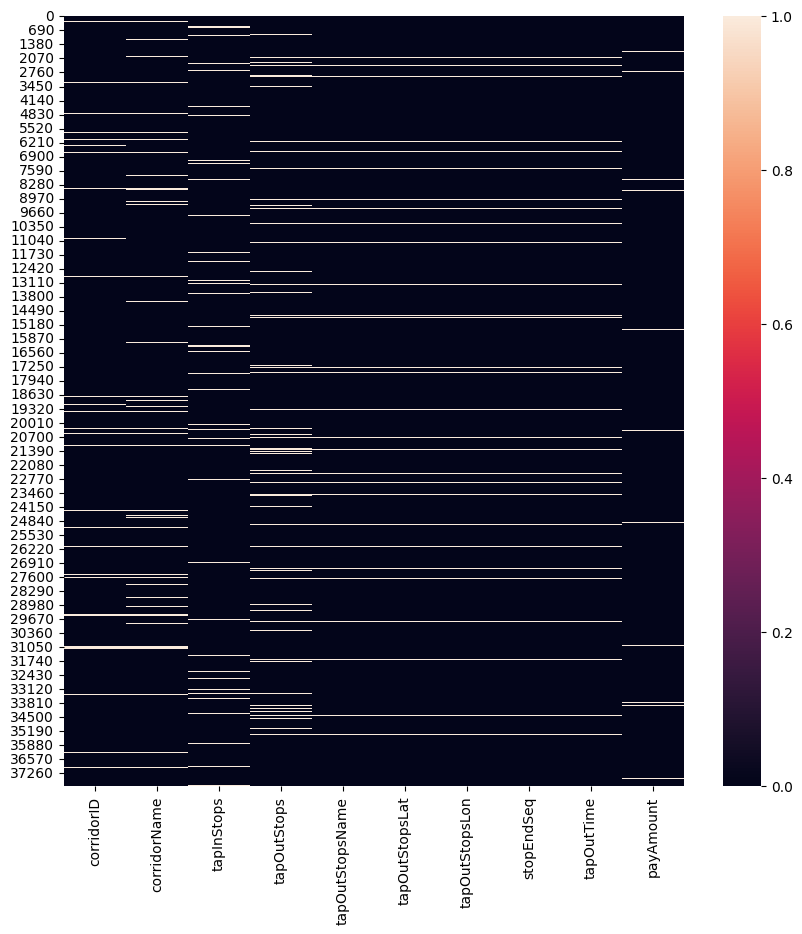

In [200]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df_raw[[
    'corridorID',
    'corridorName',
    'tapInStops',
    'tapOutStops',
    'tapOutStopsName',
    'tapOutStopsLat',
    'tapOutStopsLon',
    'stopEndSeq',
    'tapOutTime',
    'payAmount']].isna())

Secara garis besar:
- *missing value* secara proporsional pada setiap kolom tidak melebihi 10% dengan proporsi paling besar ada pada kolom `tapOutStops` sebesar 6.03% diikuti oleh kolom `corridorName ` sebesar 5.09%, sedangkan kolom lain yang memiliki missing value berproporsi dibawah 4%.
- *missing value* pada kolom `tapOutStopsName` hingga `tapOutTime`memiliki sebaran yang terlihat berkaitan, jika data di `tapOutStopsName` kosong, maka kemungkinan besar data di `tapOutTime` juga kosong.

Kita sudah melihat gambaran kasar anomali di dalam data kita, sekarang, mari kita lihat dan tangani tiap-tiap anomali secara lebih jauh.  

### Data Wrangling

In [201]:
df_clean = df_raw.copy()
df_clean.head(1)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0


#### `corridorID`

In [202]:
pd.set_option('display.max_rows', 10)
df_raw.loc[df_raw['corridorID'].isna() == True]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
7,XTKE052E5E87LN,3587341902618993,dki,Darmanto Rajasa,F,1991,NaN,NaN,1.0,B03416P,SDN Pondok Labu 11,-6.313269,106.80221,2,2023-04-03 06:44:24,B00899P,Jln. Baros,-6.311046,106.78400,12.0,2023-04-03 07:11:43,0.0
120,MCWO805A6Q66MX,3570416613897992,dki,"Gawati Damanik, S.E.",F,2010,NaN,NaN,0.0,P00109,Matraman Baru,-6.212880,106.86115,8,2023-04-03 06:38:44,P00224,Slamet Riyadi,-6.208533,106.85929,9.0,2023-04-03 07:32:11,3500.0
240,PTDK452M9A71XF,342370004909630,emoney,"Kartika Habibi, S.Psi",M,1975,NaN,NaN,0.0,B04505P,Sbr. Standard Chartered,-6.217407,106.81934,13,2023-04-03 05:13:16,B03396P,Kota Kasablanka,-6.224688,106.84246,20.0,2023-04-03 05:39:55,3500.0
250,OLZA217B5B95DK,4371940047525876160,brizzi,Zelda Laksita,M,2009,NaN,NaN,1.0,B04576P,Sbr. Univ. Mercu Buana,-6.210273,106.73786,11,2023-04-03 06:24:37,B05009P,Simpang Meruya Ilir 1,-6.196682,106.75517,28.0,2023-04-03 07:13:18,0.0
257,GHEY769K9T55WF,4281653494791,online,Zelda Wibowo,M,1989,NaN,NaN,0.0,B00048P,Aneka PIK Penggilingan,-6.202636,106.92867,16,2023-04-03 05:05:24,B05823P,United Tractors 1,-6.183260,106.93243,28.0,2023-04-03 05:41:12,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37689,ZVAU363K8Z72QF,4235440226938980,dki,Tgk. Tari Wibowo,F,1989,NaN,NaN,1.0,P00014,Bermis,-6.178203,106.89859,23,2023-04-28 19:01:21,P00192,Pulo Gadung 1,-6.183239,106.90907,24.0,2023-04-28 21:23:44,3500.0
37727,MGBX067C2V69EZ,213145593134816,emoney,Ulva Namaga,F,1995,NaN,NaN,1.0,P00146,Pangeran Jayakarta,-6.137611,106.81792,6,2023-04-16 17:38:14,P00092,Jembatan Merah,-6.146731,106.83427,9.0,2023-04-16 18:14:25,3500.0
37770,RGLG273G3M96TE,4725638979751926133,brizzi,"Murti Simanjuntak, M.Farm",M,1988,NaN,NaN,1.0,P00076,Gunung Sahari Mangga Dua,-6.136817,106.83237,11,2023-04-16 09:06:33,P00141,Pakin,-6.127982,106.80474,25.0,2023-04-16 11:14:06,3500.0
37797,HBLN935K0C66OQ,4667337468542,online,"drg. Bala Yolanda, S.Farm",M,1984,NaN,Rusun Marunda - Terminal Terpadu Pulo Gebang,1.0,B04607P,Sbr. Marunda Baru,-6.124819,106.95694,59,2023-04-29 19:18:55,B02223P,Marlindo Marunda,-6.121746,106.95715,61.0,2023-04-29 20:02:28,0.0


In [203]:
pd.set_option('display.max_rows', 10)
df_raw.loc[df_raw['corridorID'].isna() == True,['corridorID','corridorName']]

,corridorID,corridorName
7,NaN,NaN
120,NaN,NaN
240,NaN,NaN
250,NaN,NaN
257,NaN,NaN
...,...,...
37689,NaN,NaN
37727,NaN,NaN
37770,NaN,NaN
37797,NaN,Rusun Marunda - Terminal Terpadu Pulo Gebang


Dapat dilihat bahwa jika nilai corridorID kosong maka kemungkinan besar corridorName juga kosong. Namun terdapat baris dimana corridorName memiliki nilai walaupun corridorID kosong.

In [204]:
print('Jumlah baris dengan corridorID kosong: ',df_raw['corridorID'].isna().sum())
this_2 = df_raw.loc[(df_raw['corridorID'].isna() == True)&(df_raw['corridorName'].isna() == False),['corridorID','corridorName']]
print('Jumlah baris dengan corridorID kosong dan corridorName memiliki nilai: ',this_2['corridorName'].count())
display(this_2.head())


Jumlah baris dengan corridorID kosong:  1257
Jumlah baris dengan corridorID kosong dan corridorName memiliki nilai:  132


,corridorID,corridorName
438,NaN,Rusun Waduk Pluit - Penjaringan
895,NaN,Tanah Abang - Kebayoran Lama
1410,NaN,Sunter Boulevard Barat - Penjaringan
1723,NaN,Pulo Gebang - Pulo Gadung 2 via PIK
2423,NaN,Kampung Melayu - Pulo Gebang via BKT


Terdapat 132 baris yang memiliki nilai corridorName namun corridorID kosong. Jika kita lihat semua baris dengan corridorName Rusun Waduk Pluit - Penjaringan:

In [205]:
this = df_raw.loc[(df_raw['corridorName']== 'Rusun Waduk Pluit - Penjaringan'),['corridorID','corridorName']].copy()
this = this.replace(np.NAN, 'kosong')
this['corridorID'].value_counts()

corridorID
12C       131
kosong      1
Name: count, dtype: int64

Baris dengan nilai corridorName `Rusun Waduk Pluit - Penjaringan` pasti memiliki nilai corridorID `12C` (mengabaikan nilai kosong). Hal ini menunjukkan keterkaitan corridorID dengan corridorName dan sesuai dengan definisi corridorID (no. ID koridor) dan corridorName (nama koridor). Maka kita akan membuat df yang mengandung pasangan corridorID dan corridorName.

In [206]:
df_corridor= df_raw.loc[:,['corridorID','corridorName']].dropna().groupby(['corridorID','corridorName']).value_counts().reset_index().drop('count',axis=1).drop_duplicates()
df_corridor

,corridorID,corridorName
0,1,Blok M - Kota
1,10,Tanjung Priok - PGC 2
2,10A,Rusun Marunda - Tanjung Priok
3,10B,Rusun Cipinang Besar Selatan - Penas Kalimalang
4,10D,Kampung Rambutan - Tanjung Priok
...,...,...
216,S21,Ciputat - CSW
217,S22,Ciputat - Kampung Rambutan
218,S31,Bintaro - Fatmawati
219,T11,Poris Plawad - Bundaran Senayan


namun ditemukan pengecualian dari pernyataan sebelumnya yang dapat dilihat pada output dibawah.

In [207]:
df_raw.loc[(df_raw['corridorID'].isin(['M1','1']),['corridorID','corridorName'])]


,corridorID,corridorName
29,M1,Blok M - Kota
63,1,Blok M - Kota
142,1,Blok M - Kota
329,M1,Blok M - Kota
363,1,Blok M - Kota
...,...,...
36832,M1,Blok M - Kota
37032,M1,Blok M - Kota
37232,M1,Blok M - Kota
37432,M1,Blok M - Kota


Dapat dilihat bahwa corridorID 1 dan M1 memiliki corridorName yang sama. Bedasarkan [info ini](https://transjakarta.co.id/peta-rute/) ditemukan bahwa perbedaan corridorId 1 dan M1 memiliki rute dan halte yang sama dengan perbedaan hanya pada jam operasi (22.00 - 05.00). Namun pada dataset ini bis rute M1 beroperasi diluar jam operasi tersebut. Hali ini terjadi dikarenakan dataset ini adalah data dummy, maka hal tersebut diabaikan dan diasumsikan bahwa corridor 1 dan M1 adalah rute yang sama. Asumsi ini akan diterapkan pada corridorID yang memiliki corridorName yang sama.

In [208]:
count = 0 #menghitung corridorName dengan corridorID 2 atau lebih
c_unique = [] #mengandung corridorName yang unik
for c_name in df_corridor['corridorName']:
    if len(df_corridor[df_corridor['corridorName']==c_name])>1: #mengfilter corridorName dengan corridorID yang lebih dari 1
        if c_name not in c_unique:
            c_unique.append(c_name) #masukan c_name yang tidak ada dalam c_unique
            cor_id = df_corridor[df_corridor['corridorName']==c_name]
            print(cor_id)
            count += 1

print('\nJumlah pasangan corridorID dengan corridorName yang sama: ',count)

    corridorID   corridorName
0            1  Blok M - Kota
198         M1  Blok M - Kota
    corridorID         corridorName
41           2  Pulo Gadung - Monas
204         M2  Pulo Gadung - Monas
    corridorID                         corridorName
49           3  Kalideres - Bundaran HI via Veteran
205         M3  Kalideres - Bundaran HI via Veteran
    corridorID           corridorName
62           5  Matraman Baru - Ancol
207         M5  Matraman Baru - Ancol
    corridorID          corridorName
98           9  Pinang Ranti - Pluit
212         M9  Pinang Ranti - Pluit

Jumlah pasangan corridorID dengan corridorName yang sama:  5


Didapatkan bahwa terdapat 5 padang corridorID dengan corridorName yang sama, yaitu: `1 dengan M1`, `2 dengan M2`, `3 dengan M3`, `5 dengan M5`, dan `9 dengan M9`. Maka pada df_clean corridorID M1, M2, M3, M5, dan M9 masing-masing akan diganti menjadi corridor 1, 2, 3, 5, dan 9.

In [209]:
def cor_rename(cor_ID):
    match cor_ID:
        case 'M1':
            return '1'
        case 'M2':
            return '2'
        case 'M3':
            return '3'
        case 'M5':
            return '5'
        case 'M9':
            return '9'
        case _:
            return cor_ID


df_clean.loc[:,'corridorID']= df_clean.loc[:,'corridorID'].apply(cor_rename)
df_clean.loc[df_clean['corridorID'].isin(['M1','M2','M3','M5','M9'])]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount


In [210]:
df_corridor=df_corridor.drop(df_corridor[df_corridor['corridorID'].isin(['M1','M2','M3','M5','M9'])].index)
df_corridor.loc[df_corridor['corridorID'].isin(['M1','M2','M3','M5','M9'])]


,corridorID,corridorName


setelah menyesuaikan corridorID seperti yang dijelaskan sebelumnya, kita akan sekarang mengisi baris dengan CorridorID yang kosong namun memiliki corridorName yang berisi.

In [211]:
for index in range(len(df_clean)):
    if type(df_clean.loc[index,'corridorID'])!= type(np.NAN):
        continue
    if type(df_clean.loc[index,'corridorName']) == type(np.NAN):
        continue
    df_clean.loc[index,'corridorID'] = df_corridor.loc[df_corridor['corridorName']==df_clean.loc[index,'corridorName'],'corridorID'].reset_index(drop=True)[0]


In [212]:
print('Jumlah baris dengan corridorID kosong pada data mentah: ',df_raw['corridorID'].isna().sum())
print('Jumlah baris dengan corridorID kosong pada setelah diproses: ',df_clean['corridorID'].isna().sum())
this_2 = df_clean.loc[(df_clean['corridorID'].isna() == True)&(df_clean['corridorName'].isna() == False),['corridorID','corridorName']]
print('Jumlah baris dengan corridorID kosong dan corridorName memiliki nilai: ',this_2['corridorName'].count())

Jumlah baris dengan corridorID kosong pada data mentah:  1257
Jumlah baris dengan corridorID kosong pada setelah diproses:  1125
Jumlah baris dengan corridorID kosong dan corridorName memiliki nilai:  0


Sisa baris dengan corridorID dan corridorName yang kosong tidak bisa diisikan, baris ini tidak dapat digunakan untuk analisa perjalanan namun dapat digunakan untuk analisa pengguna atau transaksi, maka dari itu baris ini hanya dihapus saat melakukan analisa terkait perjalanan.

#### `corridorName`

In [213]:
print('Jumlah baris dengan corridorName kosong: ',df_raw['corridorName'].isna().sum())
this_2 = df_raw.loc[(df_raw['corridorName'].isna() == True)&(df_raw['corridorID'].isna() == False),['corridorName','corridorID']]
print('Jumlah baris dengan corridorName kosong dan corridorID memiliki nilai: ',this_2['corridorID'].count())
display(this_2.head())

Jumlah baris dengan corridorName kosong:  1930
Jumlah baris dengan corridorName kosong dan corridorID memiliki nilai:  805


,corridorName,corridorID
38,NaN,5M
39,NaN,2
60,NaN,T21
61,NaN,12A
73,NaN,M3


terdapat juga baris yang pada kolom corridorName kosong namun corridorID terisi, maka kami dapat gunakan solusi yang sama untuk mengisi baris-baris yang kosong ini

In [214]:
for index in range(len(df_clean)):
    if type(df_clean.loc[index,'corridorName'])!= type(np.NAN):
        continue
    if type(df_clean.loc[index,'corridorID']) == type(np.NAN):
        continue
    df_clean.loc[index,'corridorName'] = df_corridor.loc[df_corridor['corridorID']==df_clean.loc[index,'corridorID'],'corridorName'].reset_index(drop=True)[0]


In [215]:
print('Jumlah baris dengan corridorName kosong pada data mentah: ',df_raw['corridorName'].isna().sum())
print('Jumlah baris dengan corridorName kosong setelah diproses: ',df_clean['corridorName'].isna().sum())
this_2 = df_clean.loc[(df_clean['corridorName'].isna() == True)&(df_clean['corridorID'].isna() == False),['corridorID','corridorName']]
print('Jumlah baris dengan corridorName kosong dan corridorID memiliki nilai: ',this_2['corridorID'].count())

Jumlah baris dengan corridorName kosong pada data mentah:  1930
Jumlah baris dengan corridorName kosong setelah diproses:  1125
Jumlah baris dengan corridorName kosong dan corridorID memiliki nilai:  0


Sisa baris dengan corridorID dan corridorName yang kosong tidak bisa diisikan, baris ini tidak dapat digunakan untuk analisa perjalanan namun dapat digunakan untuk analisa pengguna atau transaksi, maka dari itu baris ini hanya dihapus saat melakukan analisa terkait perjalanan.

#### `tapInStops`

In [216]:
df_raw.loc[df_raw['tapInStops'].isna()==True]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
21,ZJVI960B9I42DA,343851798729291,emoney,Garang Utama,F,1997,JAK.16,Cililitan - Condet,0.0,NaN,Lippo Mall Kramat Jati,-6.270835,106.86741,4,2023-04-03 05:08:36,B01393P,Jln. Mesjid Al Mabruk,-6.284350,106.852930,20.0,2023-04-03 05:30:45,0.0
41,VUWZ891M7I57EB,344303671677311,emoney,"R. Mila Wahyuni, S.Sos",F,2006,R1A,Pantai Maju - Kota,1.0,NaN,Jln. BB Utara,-6.120279,106.79409,12,2023-04-03 06:50:06,B00242P,Centro Metro Broadway,-6.116362,106.761430,29.0,2023-04-03 07:30:53,3500.0
101,XVWU715D9V59FV,4744480387450088900,brizzi,Galur Riyanti,F,1980,JAK.44,Andara - Stasiun Universitas Pancasila,0.0,NaN,Jln. H. Terin Pangkalan Jati,-6.327961,106.80054,0,2023-04-03 06:45:56,B01846P,Kav Polri Blok E Jagakarsa,-6.314309,106.816330,13.0,2023-04-03 07:36:05,0.0
122,ENXD420E9G92TO,4817620823758230,dki,"Dina Halimah, S.Psi",F,1993,JAK.07,Tanah Abang - Grogol via Tawakal,0.0,NaN,Wisma Asia II,-6.189386,106.79791,19,2023-04-03 06:21:20,B04952P,Simpang Kota Bambu Utara I,-6.186126,106.808660,24.0,2023-04-03 07:09:28,0.0
163,SRLS290P0Y95NP,180074853270640,emoney,"Dr. Laswi Usamah, S.Ked",F,1959,7Q,Blok M - PGC,1.0,NaN,Wolter Monginsidi,-6.238799,106.81376,26,2023-04-03 06:12:58,B01437P,Jln. Palatehan,-6.240057,106.800758,31.0,2023-04-03 06:42:20,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37775,MYWZ762F5O31MX,344406439989280,emoney,R. Respati Usamah,F,2012,JAK.53,Grogol - Pos Pengumben via Slipi,0.0,NaN,Sbr. Gg. Langgar Kelapa Dua,-6.213145,106.76935,68,2023-04-09 18:19:04,B01162P,Jln. Inspeksi Kali Pesanggrahan Barat,-6.208392,106.764670,70.0,2023-04-09 19:42:22,0.0
37816,HRMG833E4D75MZ,2264435942253035,dki,Vanya Anggraini,F,2007,JAK.26,Rawamangun - Duren Sawit,1.0,NaN,Cipinang Lontar Rusun Polri,-6.206815,106.88785,12,2023-04-11 08:05:50,B02941P,Pool Hiba Utama 1,-6.206384,106.902690,32.0,2023-04-11 10:24:43,0.0
37822,XWEY170L8K03CW,3538799233101916,dki,Lantar Maheswara,F,1983,JAK.20,Cawang UKI - Lubang Buaya,1.0,NaN,Menara Cardig,-6.251608,106.88040,34,2023-04-24 11:54:53,B04630P,Sekolah Fatimiyah Perdana Kusuma,-6.249936,106.880030,35.0,2023-04-24 14:42:13,0.0
37855,OCHT739D6O31VL,4434749577653,online,drg. Ifa Salahudin,M,1950,JAK.16,Cililitan - Condet,1.0,NaN,Kel. Balekambang,-6.281630,106.84996,10,2023-04-12 15:04:05,B03442P,Sbr. Akses Jembatan Ciliwung Balekambang,-6.283464,106.849450,12.0,2023-04-12 16:54:34,0.0


In [217]:
df_raw.loc[(df_raw['tapInStops'].isna() == True),['tapInStops','tapInStopsName']]

,tapInStops,tapInStopsName
21,NaN,Lippo Mall Kramat Jati
41,NaN,Jln. BB Utara
101,NaN,Jln. H. Terin Pangkalan Jati
122,NaN,Wisma Asia II
163,NaN,Wolter Monginsidi
...,...,...
37775,NaN,Sbr. Gg. Langgar Kelapa Dua
37816,NaN,Cipinang Lontar Rusun Polri
37822,NaN,Menara Cardig
37855,NaN,Kel. Balekambang


dapat dilihat bahwa relasi antara tapInStops dengan tapInStopsName sama seperti relasi antara corridorID dan corridorName.

In [218]:
print('Jumlah baris dengan tapInStops kosong: ',df_raw['tapInStops'].isna().sum())
this_2 = df_raw.loc[(df_raw['tapInStops'].isna() == True)&(df_raw['tapInStopsName'].isna() == False),['tapInStops','tapInStopsName']]
print('Jumlah baris dengan tapInStops kosong dan tapInStopsName memiliki nilai: ',this_2['tapInStopsName'].count())
display(this_2.head())

Jumlah baris dengan tapInStops kosong:  1213
Jumlah baris dengan tapInStops kosong dan tapInStopsName memiliki nilai:  1213


,tapInStops,tapInStopsName
21,NaN,Lippo Mall Kramat Jati
41,NaN,Jln. BB Utara
101,NaN,Jln. H. Terin Pangkalan Jati
122,NaN,Wisma Asia II
163,NaN,Wolter Monginsidi


Semua (1212) baris yang tidak memiliki nilai tapInStops memiliki nilai tapInStopsName. Jika kita lihat semua baris dengan tapInStopsName Lippo Mall Kramat Jati:

In [219]:
df_raw.loc[df_raw['tapInStopsName']=='Lippo Mall Kramat Jati',['tapInStops','tapInStopsName']].head(5)

,tapInStops,tapInStopsName
21,NaN,Lippo Mall Kramat Jati
621,B02144P,Lippo Mall Kramat Jati
1221,B02144P,Lippo Mall Kramat Jati
1821,B02144P,Lippo Mall Kramat Jati
2421,B02144P,Lippo Mall Kramat Jati


Baris dengan nilai tapInStopsName `Lippo Mall Kramat Jati` pasti memiliki tapInStops `B02144P` (mengabaikan nilai kosong). Hal ini menunjukkan keterkaitan tapInStops dengan tapInStopsName dan sesuai dengan definisi tapInStops (no. ID halte) dan tapInStopsName (nama halte). Maka kita akan membuat df yang mengandung pasangan corridorID dan tapInStopsName.

In [220]:
df_stopsin= df_raw.loc[:,['tapInStops','tapInStopsName']].dropna().groupby(['tapInStops','tapInStopsName']).value_counts().reset_index().drop('count',axis=1).drop_duplicates()
df_stopsin

,tapInStops,tapInStopsName
0,B00001P,18 Office Park
1,B00004P,ACC Simatupang
2,B00005P,ACE Hardware
3,B00008P,Adam Malik 1
4,B00017P,Akper Fatmawati Pondok Labu
...,...,...
2565,P00294,Sawah Besar Arah Selatan
2566,P00295,Mangga Besar Arah Utara
2567,P00296,Mangga Besar Arah Selatan
2568,P00297,BNN LRT


In [221]:
count = 0 #menghitung tapInStopsName dengan tapInStops 2 atau lebih
s_unique = [] #mengandung tapInStopsName yang unik
for s_name in df_stopsin['tapInStopsName']:
    if len(df_stopsin[df_stopsin['tapInStopsName']==s_name])>1: #mengfilter tapInStopsName dengan tapInStops yang lebih dari 1
        if s_name not in s_unique:
            s_unique.append(s_name) #masukan s_name yang tidak ada dalam s_unique
            cor_id = df_stopsin[df_stopsin['tapInStopsName']==s_name]
            print(cor_id)
            count += 1

print('\nJumlah pasangan tapInStops dengan tapInStopsName yang sama: ',count)

     tapInStops tapInStopsName
2359     P00052   Dukuh Atas 2
2569     P00298   Dukuh Atas 2

Jumlah pasangan tapInStops dengan tapInStopsName yang sama:  1


ditemukan bahwa tapInStops P00052 dan P00298 memiliki tapInStopsName yang sama (Dukuh Atas 2)

In [222]:
df_raw.loc[(df_raw['tapInStopsName']=='Dukuh Atas 2')&(df_raw['tapInStops'].isna()==True),['tapInStops','tapInStopsName']]

,tapInStops,tapInStopsName


namun, tidak ada baris dengan nilai 'Dukuh Atas 2' pada kolom tapInStopsName yang memiliki nilai kosong pada kolom tapInStops, maka kita dapat hapus baris dengan nilai 'Dukuh Atas 2' dari df_stopsin.

In [223]:
df_stopsin.drop(df_stopsin.loc[df_stopsin['tapInStopsName']=='Dukuh Atas 2'].index,inplace=True)
df_stopsin.reset_index(drop=True)


,tapInStops,tapInStopsName
0,B00001P,18 Office Park
1,B00004P,ACC Simatupang
2,B00005P,ACE Hardware
3,B00008P,Adam Malik 1
4,B00017P,Akper Fatmawati Pondok Labu
...,...,...
2563,P00293,Sawah Besar Arah Utara
2564,P00294,Sawah Besar Arah Selatan
2565,P00295,Mangga Besar Arah Utara
2566,P00296,Mangga Besar Arah Selatan


In [224]:
print('Jumlah nilai unik tapInStopsName pada df_clean: ',df_clean['tapInStopsName'].nunique())
print('Jumlah nilai unik tapInStopsName pada df_stopsin: ',df_stopsin['tapInStopsName'].nunique())

Jumlah nilai unik tapInStopsName pada df_clean:  2602
Jumlah nilai unik tapInStopsName pada df_stopsin:  2568


Namun, ditemukan bahwa jumlah nilai tapInStopsName pada df_clean tidak sama dengan df_stopsin. Kita akan memeriksa perbedaan nilai unik pada kedua dataframe ini.

In [225]:
set_stopsin = set(df_stopsin['tapInStopsName'].unique())
set_clean = set(df_clean['tapInStopsName'].unique())
if set_stopsin.issubset(set_clean):
    print('semua nilai unik kolom tapInStopsName pada df_stopsin terdapat dalam df_clean')

this = df_clean['tapInStopsName'].unique().tolist()
tracker = []
for stops in this:
    if stops not in df_stopsin['tapInStopsName'].unique():
        if stops == 'Dukuh Atas 2': #nilai ini dihapus karena sudah dihapus pada df_stopsin
            continue
        tracker.append(stops)
tracker = pd.DataFrame(tracker,columns=['tapInStopsName'])

pd.set_option('display.max_rows', None)
print('Nilai tapInStopsName yang tidak ada dalam df_stopsin:')
tracker


semua nilai unik kolom tapInStopsName pada df_stopsin terdapat dalam df_clean
Nilai tapInStopsName yang tidak ada dalam df_stopsin:


,tapInStopsName
0,PPKD Jaktim
1,Rusun Pulo Gebang
2,Bundaran Alam Sutera 1
3,Graha Sindu Bpk Penabur
4,Rusun Rorotan 2
5,Jln. Pinang 1
6,Fatmawati 1
7,Nifarro Park
8,Ponpes Baitul Quran Al Ikhwan 1
9,Sbr. Jln. R. Anggun


Kita temukan terdapat 33 nilai tapInStopsName yang tidak terdapat dalam df_stopsin, kita akan melihat nilai-nilai ini terdapat pada baris mana pada df_clean

In [226]:
df_clean.loc[df_clean['tapInStopsName'].isin(tracker.iloc[:,0].unique())]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
32155,YWRK695S6M25WV,346031371330778,emoney,Putri Wibowo,F,1982,7P,Pondok Kelapa - BKN,0.0,NaN,PPKD Jaktim,-6.247777,106.942360,6,2023-04-08 18:01:36,NaN,NaN,NaN,NaN,NaN,NaN,3500.0
32262,MAVS929E2U67DY,5530470482508325,dki,Jamalia Lestari,F,2003,11C,Rusun Pinus Elok - Rusun Pulo Gebang,1.0,NaN,Rusun Pulo Gebang,-6.201478,106.949750,0,2023-04-09 08:35:23,NaN,NaN,NaN,NaN,NaN,NaN,0.0
32365,GFXI432F3W42KE,342872650777880,emoney,Carla Maryati,F,2006,S11,BSD - Jelambar,0.0,NaN,Bundaran Alam Sutera 1,-6.244107,106.648890,16,2023-04-09 19:53:59,B02990P,Pratama Abadi,-6.233124,106.642560,19.0,2023-04-09 20:17:31,3500.0
32533,SJEG609E5A77VR,3511593949794788,dki,Humaira Maryadi,F,1992,12B,Pluit - Senen,1.0,NaN,Graha Sindu Bpk Penabur,-6.159971,106.835090,8,2023-04-09 18:46:36,B00122P,Baywalk 2,-6.110359,106.779610,41.0,2023-04-09 19:36:31,3500.0
32572,OHMY262Z9S32VK,3531560183774236,dki,Kiandra Nashiruddin,M,1993,JAK.58,Cilincing - Rorotan,1.0,NaN,Rusun Rorotan 2,-6.149932,106.954780,0,2023-04-08 06:45:49,B05328P,SMKN Jasalena Marunda,-6.127384,106.956690,24.0,2023-04-08 07:10:38,0.0
32663,DKJP886D8B30GD,4225751347437323699,brizzi,Hj. Dewi Firmansyah,M,1978,JAK.115,Term. Tj. Priok - Pegangsaan II IGI,0.0,NaN,Jln. Pinang 1,-6.114470,106.903190,7,2023-04-09 21:44:28,B00381P,Gading Nirwana,-6.148645,106.912950,28.0,2023-04-09 22:42:32,0.0
32768,AMRU195J1Q27AC,3582791887979981,dki,Tgk. Keisha Hutasoit,M,1973,6T,Pasar Minggu - Velbak,0.0,NaN,Fatmawati 1,-6.292571,106.797430,18,2023-04-16 07:07:32,B04808P,Simpang Gandaria Kyai Maja,-6.241860,106.790000,39.0,2023-04-16 07:48:30,3500.0
32821,NXEZ755U4U05XV,4310011077804361,dki,Baktiono Hartati,F,1954,9H,Blok M - Universitas Indonesia,1.0,NaN,Nifarro Park,-6.263007,106.843320,20,2023-04-15 06:30:46,B02277P,Masjid At Taqwa 1,-6.276957,106.845870,25.0,2023-04-15 07:22:54,3500.0
32852,WQEY067N5P53RZ,371996902605484,emoney,Yuliana Hakim,M,2001,JAK.05,Semper - Rorotan,1.0,NaN,Ponpes Baitul Quran Al Ikhwan 1,-6.128812,106.964910,33,2023-04-16 20:38:07,B02439P,MI Arruhaniyah Rorotan,-6.135438,106.967440,34.0,2023-04-16 22:18:38,0.0
32861,BHHH076Q0C57JF,6582441579700211,dki,Dartono Halim,F,1983,JAK.56,Grogol - Srengseng,1.0,NaN,Sbr. Jln. R. Anggun,-6.161055,106.769920,51,2023-04-16 07:59:17,B05704P,Term. Grogol,-6.166565,106.790250,57.0,2023-04-16 09:35:19,0.0


Kita dapatkan bahwa nilai-nilai tapInStopsName yang tidak ada pada df_stopsin hanya ada pada 34 baris, karena baris yang terpengaruh sangat kecil dibandingkan dengan total baris pada dataframe, maka kami akan membiarkan baris-baris ini kosong. Tindak lanjutan akan dibahas pada akhir bagian ini.

dengan adanya df_stopsin yang mengandung pasangan tapInStops dan tapInStopsName, maka kita dapat mengisi tapInStops yang kosong.

In [227]:
for index in range(len(df_clean)):
    if type(df_clean.loc[index,'tapInStops'])!= type(np.NAN):
        continue
    if df_clean.loc[index,'tapInStopsName'] in tracker.iloc[:,0].unique():
        continue
    df_clean.loc[index,'tapInStops'] = df_stopsin.loc[df_stopsin['tapInStopsName']==df_clean.loc[index,'tapInStopsName'],'tapInStops'].reset_index(drop=True)[0]

In [228]:
print('Jumlah baris dengan tapInStops kosong pada data mentah: ',df_raw['tapInStops'].isna().sum())
print('Jumlah baris dengan tapInStops kosong pada setelah diproses: ',df_clean['tapInStops'].isna().sum())
this_2 = df_clean.loc[(df_clean['tapInStops'].isna() == True)&(df_clean['tapInStopsName'].isna() == False),['tapInStops','tapInStopsName']]
print('Jumlah baris dengan tapInStops kosong dan tapInStopsName memiliki nilai: ',this_2['tapInStopsName'].count())

Jumlah baris dengan tapInStops kosong pada data mentah:  1213
Jumlah baris dengan tapInStops kosong pada setelah diproses:  34
Jumlah baris dengan tapInStops kosong dan tapInStopsName memiliki nilai:  34


Sisa baris dengan tapInStops tidak bisa diisikan, baris ini tidak dapat digunakan untuk analisa perjalanan namun dapat digunakan untuk analisa pengguna atau transaksi, maka dari itu baris ini hanya dihapus saat melakukan analisa terkait perjalanan.

#### ``tapOutStops``

In [229]:
pd.set_option('display.max_rows', 10)
df_raw.loc[df_raw['tapOutStops'].isna()==True]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
6,HEMW326B9N91TV,213155822653833,emoney,"R. Devi Hariyah, S.T.",M,1974,JAK.18,Kalibata - Kuningan,0.0,B00243P,Cervino Village,-6.224355,106.85165,25,2023-04-03 06:58:21,NaN,NaN,NaN,NaN,NaN,NaN,0.0
30,TCKQ601Q5O01BC,3589380857722689,dki,drg. Lukman Hidayanto,M,1995,JAK.46,Pasar Minggu - Jagakarsa,1.0,B00001P,18 Office Park,-6.299146,106.83210,19,2023-04-03 06:14:02,NaN,NaN,NaN,NaN,NaN,NaN,0.0
70,OTGH855B8A29BP,3549158005951908,dki,"Mustofa Wijayanti, M.Farm",M,1981,1T,Cibubur - Balai Kota,0.0,B02408P,Menara Astra,-6.207361,106.82190,7,2023-04-03 05:57:55,NaN,NaN,NaN,NaN,NaN,NaN,20000.0
89,QMHC825R0K38KM,3537543297101185,dki,Samsul Ramadan,M,1966,M11,NaN,1.0,P00158,Pasar Pulo Gadung,-6.187434,106.90591,0,2023-04-03 06:23:36,NaN,Walikota Jakarta Timur,-6.212540,106.94537,7.0,2023-04-03 06:52:14,3500.0
130,JUKK703H7F00XH,570918242399,flazz,Mumpuni Gunarto,F,1998,10D,Kampung Rambutan - Tanjung Priok,0.0,P00035,Cempaka Mas,-6.165888,106.87920,7,2023-04-03 05:40:04,NaN,NaN,NaN,NaN,NaN,NaN,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37796,UJTW104Z9P85GX,6507084113625619,dki,Kairav Yulianti,F,2002,8M,S. Parman - Tanah Abang,0.0,B03062P,Puskesmas Petojo Utara,-6.168238,106.81088,7,2023-04-02 05:55:01,NaN,NaN,NaN,NaN,NaN,NaN,3500.0
37799,GRKE798M1S93HC,4897976988760145,dki,Drs. Labuh Permata,F,2006,JAK.41,Kampung Melayu - Pulo Gadung,0.0,B02707P,Pedati Prumpung 1,-6.219904,106.87421,8,2023-04-12 15:34:06,NaN,NaN,NaN,NaN,NaN,NaN,0.0
37878,FFUS474T7Q54QF,36067042340502,bni,Jatmiko Mansur,F,1965,D32,Cinere - Bundaran Senayan,0.0,B06642P,Mega Cinere,-6.333340,106.78282,4,2023-04-16 07:59:08,NaN,FX Sudirman,-6.225532,106.80370,7.0,2023-04-16 10:58:11,20000.0
37887,UELP204M1S64QX,4068989702474318,dki,Ajimat Pradana,F,1980,4D,Pulo Gadung 2 - Kuningan,0.0,P00269,Velodrome,-6.193468,106.88830,5,2023-04-04 14:52:31,NaN,Pramuka LIA,-6.192238,106.86858,9.0,2023-04-04 15:38:58,3500.0


In [230]:
df_raw.loc[(df_raw['tapOutStops'].isna() == True),['tapOutStops','tapOutStopsName']]

,tapOutStops,tapOutStopsName
6,NaN,NaN
30,NaN,NaN
70,NaN,NaN
89,NaN,Walikota Jakarta Timur
130,NaN,NaN
...,...,...
37796,NaN,NaN
37799,NaN,NaN
37878,NaN,FX Sudirman
37887,NaN,Pramuka LIA


dapat banyak baris dengan nilai tapOutStops yang kosong dimana tapOutStopsName hingga tapOutTime juga kosong. Juga terdapat baris dimana baris memiliki nilai tapOutStopsName walaupun nilai tapOutStops kosong. Baris-baris dapat dicari nilai tapOutStops-nya.

In [231]:
print('Jumlah baris dengan tapOutStops kosong: ',df_raw['tapOutStops'].isna().sum())
this_2 = df_raw.loc[(df_raw['tapOutStops'].isna() == True)&(df_raw['tapOutStopsName'].isna() == False),['tapOutStops','tapOutStopsName']]
print('Jumlah baris dengan tapOutStops kosong dan tapInStopsName memiliki nilai: ',this_2['tapOutStopsName'].count())
display(this_2.head())

Jumlah baris dengan tapOutStops kosong:  2289
Jumlah baris dengan tapOutStops kosong dan tapInStopsName memiliki nilai:  945


,tapOutStops,tapOutStopsName
89,NaN,Walikota Jakarta Timur
149,NaN,Budi Utomo
168,NaN,Pertamina Kalideres Daan Mogot
359,NaN,Sbr. Kebantenan IX
428,NaN,HKBP Rawamangun


945 baris yang tidak memiliki nilai tapOutStops memiliki nilai tapOutStopsName. Jika kita lihat semua baris dengan tapOutStopsName Walikota Jakarta Timur:

In [232]:
df_raw.loc[df_raw['tapOutStopsName']=='Walikota Jakarta Timur',['tapOutStops','tapOutStopsName']].head(5)

,tapOutStops,tapOutStopsName
89,NaN,Walikota Jakarta Timur
223,P00270,Walikota Jakarta Timur
557,P00270,Walikota Jakarta Timur
689,P00270,Walikota Jakarta Timur
823,P00270,Walikota Jakarta Timur


Baris dengan nilai tapOutStopsName `Lippo Mall Kramat Jati` pasti memiliki tapInStops `P00270` (mengabaikan nilai kosong). Hal ini menunjukkan keterkaitan tapInStops dengan tapInStopsName dan sesuai dengan definisi tapInStops (no. ID halte) dan tapInStopsName (nama halte). Maka kita akan membuat df yang mengandung pasangan tapOutStops dan tapOutStopsName.

In [233]:
df_stopsout= df_raw.loc[:,['tapOutStops','tapOutStopsName']].dropna().groupby(['tapOutStops','tapOutStopsName']).value_counts().reset_index().drop('count',axis=1).drop_duplicates()
df_stopsout

,tapOutStops,tapOutStopsName
0,B00002P,ABA
1,B00003P,Acacia Residence
2,B00004P,ACC Simatupang
3,B00005P,ACE Hardware
4,B00013P,Ahmad Yani Pisangan Baru
...,...,...
2225,P00293,Sawah Besar Arah Utara
2226,P00294,Sawah Besar Arah Selatan
2227,P00295,Mangga Besar Arah Utara
2228,P00297,BNN LRT


In [234]:
count = 0 #menghitung tapOutStopsName dengan tapOutStops 2 atau lebih
s_unique = [] #mengandung tapOutStopsName yang unik
for s_name in df_stopsout['tapOutStopsName']:
    if len(df_stopsout[df_stopsout['tapOutStopsName']==s_name])>1: #mengfilter tapOutStopsName dengan tapOutStops yang lebih dari 1
        if s_name not in s_unique:
            s_unique.append(s_name) #masukan s_name yang tidak ada dalam s_unique
            cor_id = df_stopsout[df_stopsout['tapOutStopsName']==s_name]
            print(cor_id)
            count += 1

print('\nJumlah pasangan tapOutStops dengan tapOutStopsName yang sama: ',count)

     tapOutStops tapOutStopsName
2033      P00052    Dukuh Atas 2
2229      P00298    Dukuh Atas 2

Jumlah pasangan tapOutStops dengan tapOutStopsName yang sama:  1


ditemukan bahwa tapOutStops P00052 dan P00298 memiliki tapOutStopsName yang sama (Dukuh Atas 2)

In [235]:
df_raw.loc[(df_raw['tapOutStopsName']=='Dukuh Atas 2')&(df_raw['tapOutStops'].isna()==True),['tapOutStops','tapOutStopsName']]

,tapOutStops,tapOutStopsName
1976,NaN,Dukuh Atas 2
8576,NaN,Dukuh Atas 2
12861,NaN,Dukuh Atas 2


terdapat 3 baris dengan nilai 'Dukuh Atas 2' pada kolom tapOutStopsName yang memiliki nilai kosong pada kolom tapOutStops di df_clean. Kita nanti kita akan menangani baris-baris kosong, untuk sementara ini kita akan menghapus baris dengan nilai 'Dukuh Atas 2' dari df_stopsout.

In [236]:
df_stopsout.drop(df_stopsout.loc[df_stopsout['tapOutStopsName']=='Dukuh Atas 2'].index,inplace=True)
df_stopsout.reset_index(drop=True)

,tapOutStops,tapOutStopsName
0,B00002P,ABA
1,B00003P,Acacia Residence
2,B00004P,ACC Simatupang
3,B00005P,ACE Hardware
4,B00013P,Ahmad Yani Pisangan Baru
...,...,...
2223,P00292,Harmoni Arah Selatan
2224,P00293,Sawah Besar Arah Utara
2225,P00294,Sawah Besar Arah Selatan
2226,P00295,Mangga Besar Arah Utara


In [237]:
print('Jumlah nilai unik tapOutStopsName pada df_clean: ',df_clean['tapOutStopsName'].nunique())
print('Jumlah nilai unik tapOutStopsName pada df_stopsout: ',df_stopsout['tapOutStopsName'].nunique())

Jumlah nilai unik tapOutStopsName pada df_clean:  2248
Jumlah nilai unik tapOutStopsName pada df_stopsout:  2228


Namun, ditemukan bahwa jumlah nilai tapOutStopsName pada df_clean tidak sama dengan df_stopsout. Kita akan memeriksa perbedaan nilai unik pada kedua dataframe ini.

In [238]:
set_stopsout = set(df_stopsout['tapOutStopsName'].unique())
set_clean = set(df_clean['tapOutStopsName'].unique())
if set_stopsout.issubset(set_clean):
    print('semua nilai unik kolom tapOutStopsName pada df_stopsout terdapat dalam df_clean')
else:
    print('TIDAK semua nilai unik kolom tapOutStopsName pada df_stopsout terdapat dalam df_clean')

this = df_clean['tapOutStopsName'].unique().tolist()
tracker = []
for stops in this:
    if stops not in df_stopsout['tapOutStopsName'].unique():
        if stops == 'Dukuh Atas 2' or type(stops) == type(np.NAN): #nilai ini dihapus karena sudah dihapus pada df_stopsout
            continue
        tracker.append(stops)
tracker = pd.DataFrame(tracker,columns=['tapOutStopsName'])

pd.set_option('display.max_rows', None)
print('Nilai tapOutStopsName yang tidak ada dalam df_stopsout:')
tracker

semua nilai unik kolom tapOutStopsName pada df_stopsout terdapat dalam df_clean
Nilai tapOutStopsName yang tidak ada dalam df_stopsout:


,tapOutStopsName
0,Jln. H. Yahya
1,Sbr. Jl H Emuntipala I
2,Sbr. Ps. Pisang
3,Exit Tol Veteran Bintaro
4,MIN 8 Srengseng Sawah
5,Masjid Al Waqof
6,Sbr. Persada Purnawira Halim
7,Grha Intirub
8,Jln. Timbul III
9,SMAN 28


Kita temukan terdapat 20 nilai tapOutStopsName yang tidak terdapat dalam df_stopsout, kita akan melihat nilai-nilai ini terdapat pada baris mana pada df_clean

In [239]:
df_clean.loc[(df_clean['tapOutStopsName'].isin(tracker.iloc[:,0].unique()))]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
32068,BXRQ766N7W94KH,3582791887979981,dki,Tgk. Keisha Hutasoit,M,1973,JAK.02,Kampung Melayu - Duren Sawit,0.0,B05022P,Simpang Otista III Utara,-6.231843,106.86776,2,2023-04-08 16:32:00,NaN,Jln. H. Yahya,-6.230219,106.87122,5.0,2023-04-08 17:20:01,0.0
32419,SRCX260G7J04ZB,343897458234312,emoney,Rahayu Prabowo,M,1973,JAK.75,Cililitan - Kp. Pulo,1.0,B03111P,RPTRA Kampung Pulo Asri,-6.277931,106.88373,0,2023-04-09 19:56:07,NaN,Sbr. Jl H Emuntipala I,-6.277035,106.87761,5.0,2023-04-09 20:31:15,0.0
32570,CSCL544U0W09DD,503837878738,flazz,Rahmi Lazuardi,M,1982,JAK.11,Tanah Abang - Kebayoran Lama,1.0,B05102P,Simpang Rawa Belong Palmerah Barat,-6.206630,106.78342,20,2023-04-08 08:55:05,NaN,Sbr. Ps. Pisang,-6.207759,106.79233,25.0,2023-04-08 09:14:01,0.0
32926,FOHO550C4G76FJ,3543024804143004,dki,R. Oni Lailasari,M,1996,JAK.49,Lebak Bulus - Cipulir,0.0,B00479P,Gg. H. Sanusi I Ulujami,-6.241758,106.76298,9,2023-04-15 11:36:25,NaN,Exit Tol Veteran Bintaro,-6.262649,106.76654,39.0,2023-04-15 13:04:15,0.0
32960,SLEX356F6M31TA,4713105079051022,dki,Gangsar Palastri,F,1984,JAK.64,Lenteng Agung - Aseli,1.0,B04556P,Sbr. TK Kartika VIII -13,-6.345264,106.82746,2,2023-04-16 09:06:57,NaN,MIN 8 Srengseng Sawah,-6.335943,106.82628,17.0,2023-04-16 10:59:28,0.0
33424,ONZF587U9M08JU,3536572066357562,dki,Vivi Salahudin,F,1990,JAK.117,Tanjung Priok - Tanah Merdeka,1.0,NaN,Simpang Jln. Kramat Jaya 2,-6.108692,106.91742,1,2023-04-22 15:16:20,NaN,Masjid Al Waqof,-6.110646,106.91733,2.0,2023-04-22 15:54:34,0.0
33550,MZTM966E6Y39AS,4384998305312935092,brizzi,Oni Uwais,M,2003,JAK.20,Cawang UKI - Lubang Buaya,1.0,B05153P,Simpang Squadron,-6.267009,106.87725,18,2023-04-23 15:11:30,NaN,Sbr. Persada Purnawira Halim,-6.259198,106.88547,30.0,2023-04-23 16:18:37,0.0
33961,POUD123Y3H41XB,4300964686794,online,Ir. Prakosa Maryadi,F,1994,JAK.21,Cililitan - Dwikora,0.0,B01724P,Jasa Marga Cililitan 2,-6.264703,106.87224,5,2023-04-23 06:17:27,NaN,Grha Intirub,-6.265216,106.87599,7.0,2023-04-23 08:08:49,0.0
34084,EQOM074W9Q50QT,3523501988176433,dki,Eli Mangunsong,F,2001,JAK.64,Lenteng Agung - Aseli,1.0,B00785P,IBI-K 57,-6.334036,106.83300,13,2023-04-23 21:26:34,NaN,Jln. Timbul III,-6.350411,106.80329,32.0,2023-04-23 22:53:38,0.0
34120,PPYB425L2N60NU,564493024850,flazz,"drg. Pranata Sihotang, M.Farm",F,1993,JAK.46,Pasar Minggu - Jagakarsa,0.0,B02101P,KUA Pasar Minggu,-6.300085,106.82626,21,2023-04-30 17:00:40,NaN,SMAN 28,-6.286109,106.83318,30.0,2023-04-30 18:05:06,0.0


Kita dapatkan bahwa nilai-nilai tapOutStopsName yang tidak ada pada df_stopsout hanya ada pada 19 baris, karena baris yang terpengaruh sangat kecil dibandingkan dengan total baris pada dataframe, maka kami akan membiarkan baris-baris ini kosong. Tindak lanjutan akan dibahas pada akhir bagian ini.

dengan adanya df_stopsout yang mengandung pasangan tapOutStops dan tapOutStopsName, maka kita dapat mengisi tapOutStops yang kosong.

In [240]:
for index in range(len(df_clean)):
    if type(df_clean.loc[index,'tapOutStops'])!= type(np.NAN):
        continue
    if type(df_clean.loc[index,'tapOutStopsName'])== type(np.NAN) or df_clean.loc[index,'tapOutStopsName']=='Dukuh Atas 2':
        continue
    if df_clean.loc[index,'tapOutStopsName'] in tracker.iloc[:,0].unique():
        continue
    df_clean.loc[index,'tapOutStops'] = df_stopsout.loc[df_stopsout['tapOutStopsName']==df_clean.loc[index,'tapOutStopsName'],'tapOutStops'].reset_index(drop=True)[0]

Kita akan sekarang melihat baris dengan tapOutStopsName 'Dukuh Atas 2' untuk menentukan apakah dapat membedakan nilai 'P00052' dengan 'P00298' pada tapOutStops.

In [241]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
df_clean.loc[df_clean['tapOutStopsName']=='Dukuh Atas 2']

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
176,KAGY982E0G63WU,6542837703080439,dki,Aurora Nasyiah,M,1991,M4,Pulo Gadung 2 - Dukuh Atas 2,1.0,P00269,Velodrome,-6.193468,106.88830,5,2023-04-03 06:32:33,P00052,Dukuh Atas 2,-6.203276,106.82377,15.0,2023-04-03 07:20:23,3500.0
776,VYCP933N4D90DE,6542837703080439,dki,Aurora Nasyiah,M,1991,M4,Pulo Gadung 2 - Dukuh Atas 2,1.0,P00269,Velodrome,-6.193468,106.88830,5,2023-04-04 05:08:52,P00052,Dukuh Atas 2,-6.203276,106.82377,15.0,2023-04-04 05:36:22,3500.0
1376,GYUF829J4P49DH,6542837703080439,dki,Aurora Nasyiah,M,1991,M4,Pulo Gadung 2 - Dukuh Atas 2,1.0,P00269,Velodrome,-6.193468,106.88830,5,2023-04-05 05:02:44,P00052,Dukuh Atas 2,-6.203276,106.82377,15.0,2023-04-05 05:30:35,3500.0
1976,WNJZ321W6X93GD,6542837703080439,dki,Aurora Nasyiah,M,1991,M4,Pulo Gadung 2 - Dukuh Atas 2,1.0,P00269,Velodrome,-6.193468,106.88830,5,2023-04-06 06:56:57,NaN,Dukuh Atas 2,-6.203276,106.82377,15.0,2023-04-06 07:54:09,3500.0
2576,GJEE297W6K37EZ,6542837703080439,dki,Aurora Nasyiah,M,1991,M4,Pulo Gadung 2 - Dukuh Atas 2,1.0,P00269,Velodrome,-6.193468,106.88830,5,2023-04-07 05:22:09,P00052,Dukuh Atas 2,-6.203276,106.82377,15.0,2023-04-07 05:55:26,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35816,HYUP429Y7N07AV,370095866460258,emoney,Pranata Tampubolon,F,1979,M4,Pulo Gadung 2 - Dukuh Atas 2,1.0,P00077,Halimun,-6.205137,106.83338,14,2023-04-15 17:35:48,P00052,Dukuh Atas 2,-6.203276,106.82377,15.0,2023-04-15 19:22:59,3500.0
36216,LKJT085D1N80DJ,370095866460258,emoney,Pranata Tampubolon,F,1979,M4,Pulo Gadung 2 - Dukuh Atas 2,1.0,P00077,Halimun,-6.205137,106.83338,14,2023-04-16 16:56:22,P00052,Dukuh Atas 2,-6.203276,106.82377,15.0,2023-04-16 17:54:53,3500.0
36616,NSCO625G8E21QB,370095866460258,emoney,Pranata Tampubolon,F,1979,M4,Pulo Gadung 2 - Dukuh Atas 2,1.0,P00077,Halimun,-6.205137,106.83338,14,2023-04-17 18:55:35,P00052,Dukuh Atas 2,-6.203276,106.82377,15.0,2023-04-17 20:10:24,3500.0
37016,AYQH654A7J33WC,370095866460258,emoney,Pranata Tampubolon,F,1979,M4,Pulo Gadung 2 - Dukuh Atas 2,1.0,P00077,Halimun,-6.205137,106.83338,14,2023-04-18 19:01:56,P00052,Dukuh Atas 2,-6.203276,106.82377,15.0,2023-04-18 20:28:13,3500.0


tidak ditemukan pada dataset ini, informasi (khususnya dilihat pada corridorID) yang dapat membedakan nilai 'P00052' dengan 'P00298'. Sehingga halte dengan nilai tapOutStopsName 'Dukuh Atas 2' tidak dapat menentukan nilai tapOutStops yang kosong dan dibiarkan kosong.

In [242]:
print('Jumlah baris dengan tapOutStops kosong pada data mentah: ',df_raw['tapOutStops'].isna().sum())
print('Jumlah baris dengan tapOutStops kosong pada setelah diproses: ',df_clean['tapOutStops'].isna().sum())
this_2 = df_clean.loc[(df_clean['tapOutStops'].isna() == True)&(df_clean['tapOutStopsName'].isna() == False),['tapOutStops','tapOutStopsName']]
print('Jumlah baris dengan tapOutStops kosong dan tapOutStopsName memiliki nilai: ',this_2['tapOutStopsName'].count())

Jumlah baris dengan tapOutStops kosong pada data mentah:  2289
Jumlah baris dengan tapOutStops kosong pada setelah diproses:  1366
Jumlah baris dengan tapOutStops kosong dan tapOutStopsName memiliki nilai:  22


Masih terdapat baris dengan nilai tapOutStops kosong, beberapa baris ini juga tidak memiliki nilai tapOutStopsName hingga tapOutTime. Baris ini akan diinvestigasi lanjust pada seksi berikutnya. Sedangkan 22 baris lainnya tidak bisa ditentukan nilai tapOutStops-nya dikarenakan tidak pada dataset tidak ada pasangan tapOutStop dan tapOutStopName atau pada kasus 'Dukuh Atas 2' berpasangan dengan 2 nilai tapOutStop dan tidak bisa ditentukan nilai tapOutStop terdapat pada baris mana.

#### ``tapOutStopName`` - ``TapOutTime``

In [243]:
pd.set_option('display.max_rows', 10)
df_raw.loc[df_raw['tapOutStopsName'].isna()==True]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
6,HEMW326B9N91TV,213155822653833,emoney,"R. Devi Hariyah, S.T.",M,1974,JAK.18,Kalibata - Kuningan,0.0,B00243P,Cervino Village,-6.224355,106.85165,25,2023-04-03 06:58:21,NaN,NaN,NaN,NaN,NaN,NaN,0.0
30,TCKQ601Q5O01BC,3589380857722689,dki,drg. Lukman Hidayanto,M,1995,JAK.46,Pasar Minggu - Jagakarsa,1.0,B00001P,18 Office Park,-6.299146,106.83210,19,2023-04-03 06:14:02,NaN,NaN,NaN,NaN,NaN,NaN,0.0
70,OTGH855B8A29BP,3549158005951908,dki,"Mustofa Wijayanti, M.Farm",M,1981,1T,Cibubur - Balai Kota,0.0,B02408P,Menara Astra,-6.207361,106.82190,7,2023-04-03 05:57:55,NaN,NaN,NaN,NaN,NaN,NaN,20000.0
130,JUKK703H7F00XH,570918242399,flazz,Mumpuni Gunarto,F,1998,10D,Kampung Rambutan - Tanjung Priok,0.0,P00035,Cempaka Mas,-6.165888,106.87920,7,2023-04-03 05:40:04,NaN,NaN,NaN,NaN,NaN,NaN,3500.0
192,KKPV811K6H59ZY,3548650711273610,dki,Balangga Permadi,F,2011,3F,Kalideres - Gelora Bung Karno,0.0,P00050,Dispenda Samsat Barat,-6.154634,106.73810,11,2023-04-03 06:15:53,NaN,NaN,NaN,NaN,NaN,NaN,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37738,HVBG065E5W16QD,5340783842827882,dki,Rendy Pratama,F,1989,5F,Kampung Melayu - Tanah Abang,1.0,B02318P,Masjid Jami Al Makmur 2,-6.188960,106.81516,0,2023-04-30 07:34:10,NaN,NaN,NaN,NaN,NaN,NaN,3500.0
37762,LBYO897O0Z89FX,4159889370953,online,Vera Pangestu,F,1992,JAK.18,Kalibata - Kuningan,0.0,B00573P,Gg. Trijaya IV Tebet Timur,-6.232163,106.85280,20,2023-04-21 12:08:43,NaN,NaN,NaN,NaN,NaN,NaN,0.0
37777,JBJR710B1I01HV,4380502298652105326,brizzi,Ella Zulkarnain,M,1990,JAK.30,Grogol - Meruya via Roxy,1.0,B01914P,Kel. Duri Kepa,-6.185225,106.77307,43,2023-04-03 21:59:15,NaN,NaN,NaN,NaN,NaN,NaN,0.0
37796,UJTW104Z9P85GX,6507084113625619,dki,Kairav Yulianti,F,2002,8M,S. Parman - Tanah Abang,0.0,B03062P,Puskesmas Petojo Utara,-6.168238,106.81088,7,2023-04-02 05:55:01,NaN,NaN,NaN,NaN,NaN,NaN,3500.0


Bedasarkan penjelasan sumber [ini](https://transjakarta.co.id/faq-sistem-uji-coba-tap-out/) dan [ini](https://kumparan.com/jendela-dunia/apakah-harus-tap-out-transjakarta-ini-jawabannya-1zacI2dqecr/full), pelanggan wajib melakukan *tap out*, namun terdapat juga aturan jika pelanggan gagal melakukan tap out saat meninggalkan bis, ini menunjukkan bahwa palanggan dapat (secara sengaja atau tidak sengaja) meninggalkan bis tanpa melakukan tap out yang menyebabkan data tap out (tapOutStops-tapOutTime) menjadi kosong. Maka dapat diasumsikan bahwa data kosong tersebut adalah `Missing Not At Random` (MNAR) dan dapat menjadi topik analisis.

baris-baris ini tidak dapat digunakan untuk analisa perjalanan namun dapat digunakan untuk analisa pengguna atau transaksi, maka dari itu baris ini hanya dihapus saat melakukan analisa terkait perjalanan.

#### `payAmount`

sebelum menganalisa nilai kosong, mari kita pertama memeriksa konteks nilai 0.0

In [244]:
pd.set_option('display.max_rows', 10)
df_raw.loc[df_raw['payAmount']==0]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
6,HEMW326B9N91TV,213155822653833,emoney,"R. Devi Hariyah, S.T.",M,1974,JAK.18,Kalibata - Kuningan,0.0,B00243P,Cervino Village,-6.224355,106.85165,25,2023-04-03 06:58:21,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7,XTKE052E5E87LN,3587341902618993,dki,Darmanto Rajasa,F,1991,NaN,NaN,1.0,B03416P,SDN Pondok Labu 11,-6.313269,106.80221,2,2023-04-03 06:44:24,B00899P,Jln. Baros,-6.311046,106.78400,12.0,2023-04-03 07:11:43,0.0
14,LZFD368Q3E81HJ,4056836188316,online,Nadine Utami,M,1975,JAK.46,Pasar Minggu - Jagakarsa,1.0,B00608P,Gelanggang Remaja Pasar Minggu,-6.284615,106.83787,5,2023-04-03 05:38:44,B01062P,Jln. Gabus Raya,-6.301222,106.83623,17.0,2023-04-03 06:09:17,0.0
19,ZYRL615G4C05RD,5430018591726410,dki,Karna Waskita,M,1981,JAK.88,Terminal Tanjung Priok - Ancol Barat,0.0,B00722P,Gunung Sahari Mangga Dua Timur,-6.137032,106.83254,20,2023-04-03 06:43:49,B05989P,Jln. Ancol Barat 6,-6.124810,106.81983,36.0,2023-04-03 07:30:45,0.0
21,ZJVI960B9I42DA,343851798729291,emoney,Garang Utama,F,1997,JAK.16,Cililitan - Condet,0.0,NaN,Lippo Mall Kramat Jati,-6.270835,106.86741,4,2023-04-03 05:08:36,B01393P,Jln. Mesjid Al Mabruk,-6.284350,106.85293,20.0,2023-04-03 05:30:45,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37891,XQDZ821C9G88JD,2712823212983860,dki,"drg. Maras Wibowo, S.Ked",F,1966,JAK.30,Grogol - Meruya via Roxy,1.0,B01209P,Jln. Kartika Meruya Selatan,-6.203099,106.73673,14,2023-04-19 16:31:09,B04071P,Sbr. Masjid Nurul Falah Grogol,-6.170757,106.78477,53.0,2023-04-19 19:13:53,0.0
37892,YHJT665I6G08OS,4775206940093,online,"Cahyo Sudiati, M.Farm",M,1979,JAK.52,Terminal Kalideres - Terminal Muara Angke,1.0,B01087P,Jln. Gunung Galunggung 1,-6.142286,106.73712,29,2023-04-28 16:38:56,B03207P,RSUD Cengkareng,-6.142238,106.73398,30.0,2023-04-28 18:35:16,0.0
37893,GNET512K3A93CA,3500965207195341,dki,Latika Salahudin,F,2000,JAK.80,Rawa Buaya - Rawa Kompeni,0.0,B02485P,MTsN 37,-6.097910,106.70237,39,2023-04-19 08:16:10,B03053P,Puskesmas Kel. Kamal II,-6.100938,106.69786,42.0,2023-04-19 10:32:30,0.0
37894,ZXVG342K6T27GU,4475487986105118550,brizzi,"Tgk. Dipa Purnawati, S.E.I",F,2012,JAK.39,Kalimalang - Duren Sawit,0.0,B04489P,Sbr. SMPN 252,-6.239289,106.94229,27,2023-04-14 11:36:12,B01624P,Jln. Swakarsa III Pondok Kelapa,-6.244759,106.94249,35.0,2023-04-14 13:15:25,0.0


In [245]:
pd.set_option('display.max_rows', None)
#menunjukkan corridorID yang memiliki nilai payAmount == 0
df_raw.loc[(df_raw['payAmount']==0)&(df_raw['corridorID'].isna()==False),['corridorID','payAmount']].groupby('corridorID').count().sort_values(by='corridorID').drop('payAmount',axis=1)

""
corridorID
10A
10B
11B
11C
11K
11M
11N
11P
12C


In [246]:
gratis= df_raw.loc[(df_raw['payAmount']==0)&(df_raw['corridorID'].isna()==False),'corridorID'].unique() #menyimpan corridorID dengan payAmount == 0
#menunjukkan semua pelanggan dikenakan biaya gratis atau ada pelanggan yang bayar pada corridorID yang disimpan.
df_raw.loc[(df_raw['corridorID'].isin(gratis))&(df_raw['payAmount']>0),['corridorID','payAmount']]

,corridorID,payAmount


ditemukan bahwa payAmount yang bernilai 0 hanya ada pada corridorID tertentu dan corridorID tersebut tidak memiliki nilai payAmount selain 0.

In [247]:
set_0 = set(df_raw.loc[(df_raw['payAmount']==0)&(df_raw['corridorID'].isna()==False),'corridorID'].unique().tolist())
set_3500 = set(df_raw.loc[(df_raw['payAmount']==3500)&(df_raw['corridorID'].isna()==False),'corridorID'].unique().tolist())
set_20000 = set(df_raw.loc[(df_raw['payAmount']==20000)&(df_raw['corridorID'].isna()==False),'corridorID'].unique().tolist())

In [248]:
if set_0.isdisjoint(set_3500):
    print('tidak ada irisan antara corridorID yang bayar 0 dengan corridorID yang bayar 3500')
else:
    print('ada irisan antara corridorID yang bayar 0 dengan corridorID yang bayar 3500')

if set_0.isdisjoint(set_20000):
    print('tidak ada irisan antara corridorID yang bayar 0 dengan corridorID yang bayar 20000')
else:
    print('ada irisan antara corridorID yang bayar 0 dengan corridorID yang bayar 20000')

if set_3500.isdisjoint(set_20000):
    print('tidak ada irisan antara corridorID yang bayar 3500 dengan corridorID yang bayar 20000')
else:
    print('ada irisan antara corridorID yang bayar 3500 dengan corridorID yang bayar 20000')

tidak ada irisan antara corridorID yang bayar 0 dengan corridorID yang bayar 3500
tidak ada irisan antara corridorID yang bayar 0 dengan corridorID yang bayar 20000
tidak ada irisan antara corridorID yang bayar 3500 dengan corridorID yang bayar 20000


In [249]:
df_raw.loc[:,['corridorID','payAmount']].groupby(['payAmount','corridorID']).count()

Empty DataFrame
Columns: []
Index: [(0.0, 10A), (0.0, 10B), (0.0, 11B), (0.0, 11C), (0.0, 11K), (0.0, 11M), (0.0, 11N), (0.0, 11P), (0.0, 12C), (0.0, 12F), (0.0, 2E), (0.0, 2F), (0.0, 2H), (0.0, 3A), (0.0, 3B), (0.0, 3C), (0.0, 4E), (0.0, 9F), (0.0, BW9), (0.0, JAK.01), (0.0, JAK.02), (0.0, JAK.03), (0.0, JAK.04), (0.0, JAK.05), (0.0, JAK.06), (0.0, JAK.07), (0.0, JAK.08), (0.0, JAK.10), (0.0, JAK.106), (0.0, JAK.11), (0.0, JAK.110A), (0.0, JAK.112), (0.0, JAK.113), (0.0, JAK.115), (0.0, JAK.117), (0.0, JAK.118), (0.0, JAK.12), (0.0, JAK.120), (0.0, JAK.13), (0.0, JAK.14), (0.0, JAK.15), (0.0, JAK.16), (0.0, JAK.17), (0.0, JAK.18), (0.0, JAK.19), (0.0, JAK.20), (0.0, JAK.21), (0.0, JAK.22), (0.0, JAK.23), (0.0, JAK.24), (0.0, JAK.25), (0.0, JAK.26), (0.0, JAK.27), (0.0, JAK.28), (0.0, JAK.29), (0.0, JAK.30), (0.0, JAK.31), (0.0, JAK.32), (0.0, JAK.33), (0.0, JAK.34), (0.0, JAK.35), (0.0, JAK.36), (0.0, JAK.37), (0.0, JAK.38), (0.0, JAK.39), (0.0, JAK.40), (0.0, JAK.41), (0.0, JAK.42), (0.0, JAK.43B), (0.0, JAK.43C), (0.0, JAK.44), (0.0, JAK.45), (0.0, JAK.46), (0.0, JAK.47), (0.0, JAK.49), (0.0, JAK.50), (0.0, JAK.51), (0.0, JAK.52), (0.0, JAK.53), (0.0, JAK.54), (0.0, JAK.56), (0.0, JAK.58), (0.0, JAK.59), (0.0, JAK.60), (0.0, JAK.61), (0.0, JAK.64), (0.0, JAK.71), (0.0, JAK.72), (0.0, JAK.73), (0.0, JAK.74), (0.0, JAK.75), (0.0, JAK.77), (0.0, JAK.80), (0.0, JAK.84), (0.0, JAK.85), (0.0, JAK.86), (0.0, JAK.88), (0.0, JAK.99), (3500.0, 1), (3500.0, 10), ...]

Didapatkan bahwa nilai payAmount berhubungan erat dengan nilai corridorID. Hubungan tersebut juga eksklusif, dimana baris dengan suatu nilai corridorID pasti akan memiliki satu nilai payAmount tertentu.

Contoh: baris dengan nilai corridorID `T21` pasti akan memiliki nilai payAmount `20000`.

Maka ditemukan bahwa kolom ini dapat bersifat kategorik dimana kolom ini menunjukkan biaya suatu corridor. Maka kita akan mengubah semua nilai kolom ini menjadi objek yang menunjukkan harga korridor. nilai ``0`` akan digantikan dengan nilai `gratis`, nilai 3500 dengan nilai `reguler` dan nilai ``20000`` dengan nilai `royal`.

Pertama kita akan mengisi nilai kosong pada payAmount dengan nilai numeric sesuai dengan corridorID.

In [250]:
print('Jumlah baris dengan payAmount kosong: ',df_clean['payAmount'].isna().sum())
this_2 = df_clean.loc[(df_clean['payAmount'].isna() == True)&(df_clean['corridorID'].isna() == False),['corridorID','payAmount']]
print('Jumlah baris dengan payAmount kosong dan corridorID memiliki nilai: ',this_2['corridorID'].count())
display(this_2.head())

Jumlah baris dengan payAmount kosong:  1007
Jumlah baris dengan payAmount kosong dan corridorID memiliki nilai:  979


,corridorID,payAmount
11,M7B,NaN
76,JAK.48B,NaN
97,3H,NaN
169,M7B,NaN
198,JAK.48A,NaN


In [251]:
pd.set_option('display.max_rows', None)
corr_ID= df_clean.loc[(df_clean['payAmount'].isna()==True),['corridorID','payAmount']].groupby(['corridorID']).count().drop('payAmount',axis=1).reset_index().corridorID.unique()
print('corridorID dengan nilai payAmount kosong: ',corr_ID)
df_clean.loc[(df_clean['corridorID'].isin(corr_ID))&(df_clean['payAmount'].isna==False),['corridorID','payAmount']]

corridorID dengan nilai payAmount kosong:  ['3H' 'JAK.48A' 'JAK.48B' 'M1H' 'M7B']


,corridorID,payAmount


dapat dilihat bahwa baris yang dengan nilai payAmount yang kosong memiliki nilai corridorID yang pada dataset tidak ada nilai payAmount selain NaN (kosong). Namun kami dapat membuat asumsi bedasarkan nilai CorridorID dan corridorName.

In [252]:
df_corridor.loc[df_corridor['corridorID'].isin(corr_ID)]

,corridorID,corridorName
55,3H,Jelambar - Kota
170,JAK.48A,Stasiun Tebet - Rusun Karet Tengsin
171,JAK.48B,Stasiun Tebet - Kampung Melayu
203,M1H,Tanah Abang - St. Gondangdia
210,M7B,BKN - Blok M


Dengan [sumber ini](https://transjakarta.co.id/peta-rute/) sebagai tumpuan (perlu dicatat dataset ini bedasarkan data pada April 2023, sehingga ada perbedaan dengan informasi terkini), maka kami dapat asumsikan bahwa:
- `JAK.48A` dan `JAK.48B` adalah koridor Mikrotrans. Bedasarkan dataset ini, semua mikrotrans (corridorID yang mengandung JAK) memiliki nilai payAmount 0.
- `3H` adalah corridor non-BRT, bedasarkan [sumber ini](https://ekonomi.bisnis.com/read/20230306/98/1634278/catat-ini-rute-terbaru-transjakarta-imbas-penutupan-halte-harmoni) pada maret 2023, rute 3H bernama Jelambar-Kota, kemudian bedasarkan [sumber ini](https://megapolitan.kompas.com/read/2023/03/15/03000051/rute-transjakarta-3h-stasiun-pesing-kota) pada desember 2023, rute 3H berubah menjadi Stasiun Pesing - Kota. Tidak ada indikasi bahwa korridor ini tidak dikenakan biaya sehingga diasumsi dikenakan biaya 3500
- `M7B` dan `M1H` tidak ada sumber yang menyatakan tipe rute ini, untuk kemudahan maka diasumsikan rute ini adalah rute BRT yang dikenakan biaya 3500

Dengan asumsi yang diatas, maka kita dapat mengisi baris dengan nilai payAmount yang kosong namun memiliki nilai corridorID.

In [253]:
nan_mask = df_raw.loc[df_raw['payAmount'].isna()==True].index
for index in range(len(df_clean)):
    if index not in nan_mask:
        continue
    if type(df_clean.loc[index,'corridorID'])== type(np.NAN):
        continue
    if df_clean.loc[index,'corridorID'] in ['JAK.48A','JAK.48B']:
        df_clean.loc[index,'payAmount'] = 0.0
        continue
    if df_clean.loc[index,'corridorID'] in ['3H','M7B','M1H']:
        df_clean.loc[index,'payAmount'] = 3500.0
        continue

Kita juga akan tambahkan kolom baru yang menandakan corridor dengan harga 0, 3500, atau 20000 masing-masing dengan masing-masing label 'gratis', 'reguler', dan 'royal' agar dapat mengelompokkan corridor tersebut dan menghitung penghasilannya.

In [254]:
payLabel = []
for ind in range (len(df_clean)):
    if df_clean.loc[ind,'payAmount'] == 0.0:
        payLabel.append('gratis')
    elif df_clean.loc[ind,'payAmount'] == 3500.0:
        payLabel.append('reguler')
    elif df_clean.loc[ind,'payAmount'] == 20000.0:
        payLabel.append('royal')
    else:
        payLabel.append(np.NAN)

df_clean['payLabel']=payLabel
df_clean['payLabel'].value_counts()

payLabel
reguler    19074
gratis     17056
royal       1742
Name: count, dtype: int64

In [255]:
print('Jumlah baris dengan payAmount kosong pada data mentah: ',df_raw['payAmount'].isna().sum())
print('Jumlah baris dengan payAmount kosong pada setelah diproses: ',df_clean['payAmount'].isna().sum())
this_2 = df_clean.loc[(df_clean['payAmount'].isna() == True)&(df_clean['corridorID'].isna() == False),['payAmount','corridorID']]
print('Jumlah baris dengan payAmount kosong dan corridorID memiliki nilai: ',this_2['corridorID'].count())

Jumlah baris dengan payAmount kosong pada data mentah:  1007
Jumlah baris dengan payAmount kosong pada setelah diproses:  28
Jumlah baris dengan payAmount kosong dan corridorID memiliki nilai:  0


Sisa baris dengan payAmount dan corridorID yang kosong tidak bisa diisikan, baris ini tidak dapat digunakan untuk analisa Transaksi namun dapat digunakan untuk analisa pengguna, maka dari itu baris ini hanya dihapus saat melakukan analisa terkait perjalanan dan/atau transaksi.

In [256]:
print('Jumlah baris kosong pada data mentah: ',df_raw.isnull().any(axis=1).sum())
print('Jumlah baris kosong pada data yang dibersihkan: ',df_clean.isnull().any(axis=1).sum())



Jumlah baris kosong pada data mentah:  6170
Jumlah baris kosong pada data yang dibersihkan:  2475


#### `tapInTime` & `tapOutTime`

Kita akan mengubah kolom tapInTime dan tapOutTime menjadi tipe data pandas [time series](https://pandas.pydata.org/docs/user_guide/timeseries.html).

In [257]:
df_clean['tapInTime'] = pd.to_datetime(df_clean['tapInTime'],format='ISO8601')

In [258]:
df_clean['tapOutTime'] = pd.to_datetime(df_clean['tapOutTime'],format='ISO8601')

catatan: dataset berupa semua transaksi pada bulan 04 (april) 2023

#### `dayName`

Kita membuat kolom baru yang mengandung nama hari transaksi, sekaligus 2 list yang masing-masing mengandung hari kerja dan hari akhir pekan.

In [259]:
df_clean['dayName'] = df_clean['tapInTime'].dt.day_name()
df_clean['dayName']=df_clean['dayName'].replace({'Monday':'Senin','Tuesday':'Selasa','Wednesday':'Rabu','Thursday':'Kamis','Friday':'Jumat','Saturday':'Sabtu','Sunday':'Minggu'})
hari_kerja= ['Senin','Selasa','Rabu','Kamis','Jumat']
akhir_pekan= ['Sabtu','Minggu']

#### `ageGroup`

Kita membuat kolom baru yang menunjukkan kelompok umur pelanggan yang melakukan transaksi

In [260]:
def ageGrouper(birthYear):
    if (2023 - birthYear) <18:
        return 'Umur Sekolah'
    elif (2023 - birthYear) <53:
        return 'Umur Bekerja'
    else:
        return 'Umur Pensiun'

def ageCounter(birthYear):
    return 2023- birthYear

df_clean['age'] = df_clean['payCardBirthDate'].apply(ageGrouper )
df_clean['ageGroup'] = df_clean['payCardBirthDate'].apply(ageGrouper )
df_clean['ageGroup'].value_counts()

ageGroup
Umur Bekerja    29332
Umur Sekolah     5412
Umur Pensiun     3156
Name: count, dtype: int64

catatan:
- Umur Bekerja: 18-53
- Umur Sekolah: 17 ke bawah
- Umur Pensiun: 53 ke atas


#### `JamLayanan`

Kita membuat kolom baru yang menunjukkan Jam transaksi tapIn terjadi

In [261]:
def timeGrouper(time):
    return time.hour
df_clean['tapInHour'] = df_clean['tapInTime'].apply(timeGrouper )
df_clean['tapInHour'].value_counts()


tapInHour
6     5839
17    5488
16    3365
5     3358
8     2880
7     2812
9     2807
19    2455
18    2438
20    2408
21    2138
15     408
13     348
11     339
12     337
10     299
14     181
Name: count, dtype: int64

catatan:
dataset tidak mengandung transaksi pada jam operasional 22.00 - 05.00, ini terjadi dikarenakan dataset merupakan data dummy, oleh karena itu dataset ini tidak dapat merepresentasikan transaksi pada jam operasi 22.00 - 05.00

## Data Analysis

### Analisis Trend transaksi

In [263]:
df_trend = df_clean.copy()
df_trend['date'] = df_trend['tapInTime'].dt.day
df_trend['week'] = df_trend['tapInTime'].dt.isocalendar().week

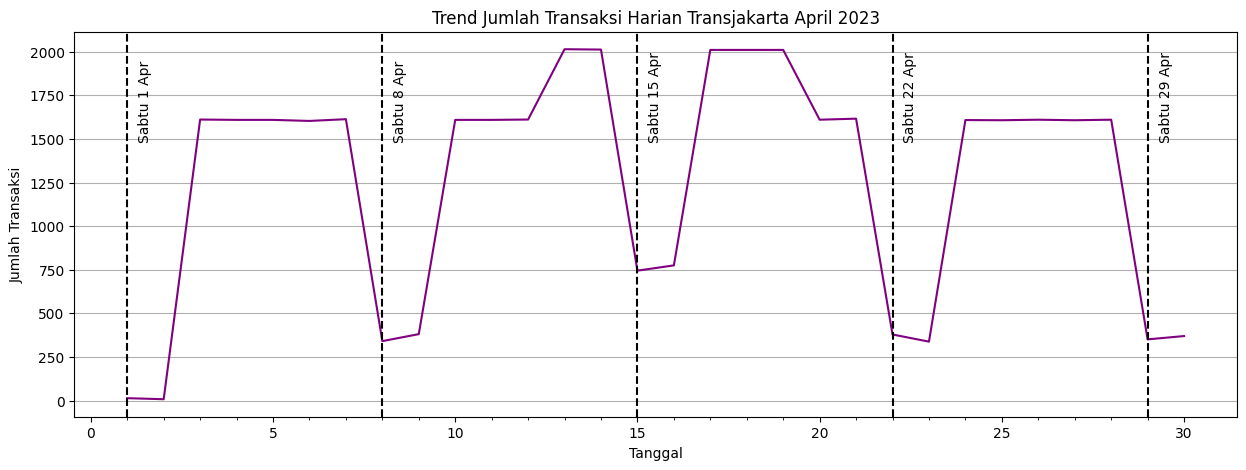

In [264]:
daily_trend = df_trend.groupby('date')['transID'].count()
plt.figure(figsize=(15,5))
plt.plot(daily_trend,color='purple')
plt.xticks(ticks=np.arange(30),minor=True)

plt.title('Trend Jumlah Transaksi Harian Transjakarta April 2023')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Transaksi')
plt.axvline(1,color='black',linestyle='--')
plt.text(1.3, 1500, 'Sabtu 1 Apr',rotation=90,color='black')
plt.axvline(8,color='black',linestyle='--')
plt.text(8.3, 1500, 'Sabtu 8 Apr',rotation=90,color='black')
plt.axvline(15,color='black',linestyle='--')
plt.text(15.3, 1500, 'Sabtu 15 Apr',rotation=90,color='black')
plt.axvline(22,color='black',linestyle='--')
plt.text(22.3, 1500, 'Sabtu 22 Apr',rotation=90,color='black')
plt.axvline(29,color='black',linestyle='--')
plt.text(29.3, 1500, 'Sabtu 29 Apr',rotation=90,color='black')

plt.grid(axis='y')
plt.show()

Observasi:
- Terdapat trend dimana pada hari-hari pekan akhir (sabtu & minggu) jumlah transaksi menurun secara drastis.
- Terjadi Lonjakan transaksi di pertengahan bulan April jika dilihat hanya hari kerja (Senin-Jumat) khususnya pada tanggal 13, 14, 17, 18, dan 19. Kemudian tren kembali normal.
- Sedangkan hari-hari pekan mengalami tren naik mulai dari tanggal 2 (Week 13 atau Week pertama April) hingga puncaknya pada tanggal 16 (Week 15), kemudian mengalami penurunan hingga tanggal 23 (Week 16).

Insight:
- Kebanyakan transaksi dilakukan pada hari-hari kerja (Senin-Jumat) Ini menunjukkan Transjakarta lebih dipakai untuk transportasi pergi ke/pulang dari tempat kerja atau sekolah.
- Pelanggan lebih memilih transportasi lain untuk berpergian pada akhir pekan jika tidak berpergian sama sekali.

In [265]:
df_clean.groupby('payLabel')['corridorID'].nunique()

payLabel
gratis     100
reguler    106
royal       10
Name: corridorID, dtype: int64

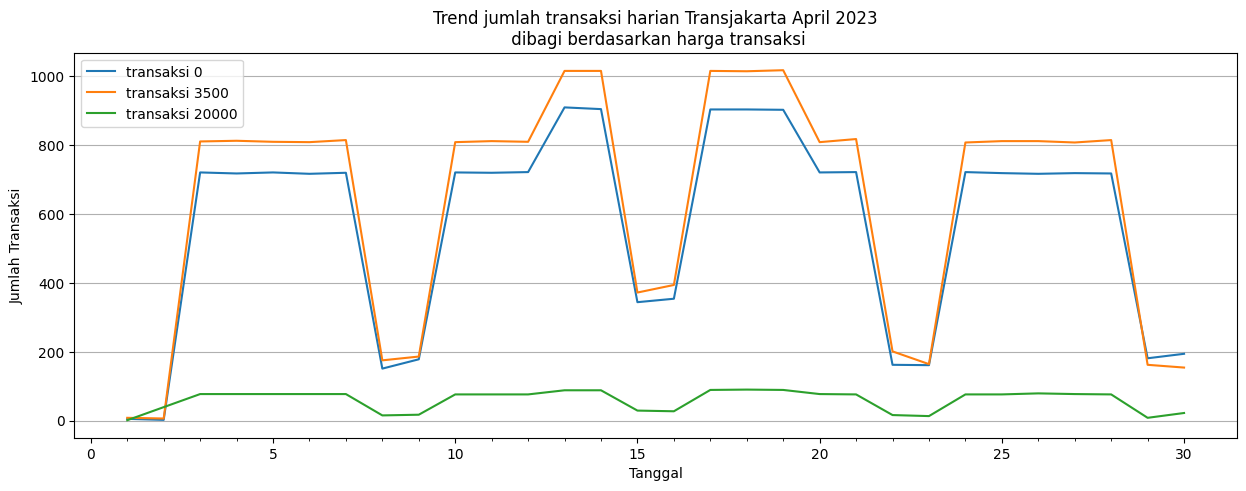

In [266]:

daily_trend_free = df_trend.loc[df_trend['payLabel']=='gratis'].groupby('date')['transID'].count()
daily_trend_reguler = df_trend.loc[df_trend['payLabel']=='reguler'].groupby('date')['transID'].count()
daily_trend_royal = df_trend.loc[df_trend['payLabel']=='royal'].groupby('date')['transID'].count()
plt.figure(figsize=(15,5))
plt.plot(daily_trend_free,label='transaksi 0')
plt.plot(daily_trend_reguler,label='transaksi 3500')
plt.plot(daily_trend_royal,label='transaksi 20000')
plt.title('Trend jumlah transaksi harian Transjakarta April 2023\n dibagi berdasarkan harga transaksi')
plt.legend(loc='upper left')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Transaksi')
plt.xticks(ticks=np.arange(30),minor=True)

plt.grid(axis='y')
plt.show()

Observasi:
- corridor yang berbayar reguler (3500) memiliki jumlah transaksi paling banyak, diikuti oleh corridor yang gratis (0) dan paling sedikit adalah corridor berbayar royal (20000).
- trend grafik diatas mengikuti trend transaksi harian, dimana terjadi jumlah transaksi banyak pada hari biasa dan sedikit pada akhir pekan.

insight:
- corridor yang berbayar reguler memiliki jumlah transaksi paling banyak dikarenakan corridor ini kebanyakan merupakan corridor layanan BRT (Bus Rapid Transit) yang memiliki kapasitas yang lebih besar [(85-120)](https://en.wikipedia.org/wiki/Transjakarta#Fleet) dan transportasi yang [cepat](https://id.wikipedia.org/wiki/Bus_raya_terpadu). Sehingga dapat melayani pelanggan yang lebih banyak. Selain BRT, terdapat juga bis layanan Rusunawa yang walaupun tidak secepat layanan BRT memiliki kapasitas mirip dengan layanan BRT.
- corridor yang berbayar gratis lebih sedikit dikarenakan corridor ini kebanyakan merupakan corridor layanan mikrotrans (mikrolet) yang memiliki kapasitas yang lebih kecil [(15)](https://otomotifnet.gridoto.com/read/232321454/transjakarta-perkenalkan-mikrotrans-model-baru-kapasitas-15-penumpang-ini-rutenya) daripada layanan BRT dan Non-BRT. Namun karena tidak dikenakan biaya dan beberapa corridor non-BRT juga ada yang tidak dikenakan biaya menjadi alasan banyak pelanggan menggunakan corridor ini, sehingga selisih jumlah transaksi tidak beda jauh.
- corridor yang berbayar royal paling sedikit dikarenakan corridor ini khusus layanan Royaltrans yang dikenakan biaya 20000. Sedikit pelanggan yang rela membayar sejumlah itu untuk transportasi. Jumlah corridor yang menyediakan layanan royaltrans yang sedikit juga membatasi jumlah pelanggan yang menggunakan layanan Royaltrans. Namun demikian, tetap ada pelanggan yang menggunakan layanan Royaltrans.

#### Perbanding Jumlah Transaksi tiap jam selama 1 bulan

<ipython-input-267-173b4f524966>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), ha='center')
<ipython-input-267-173b4f524966>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), ha='center')


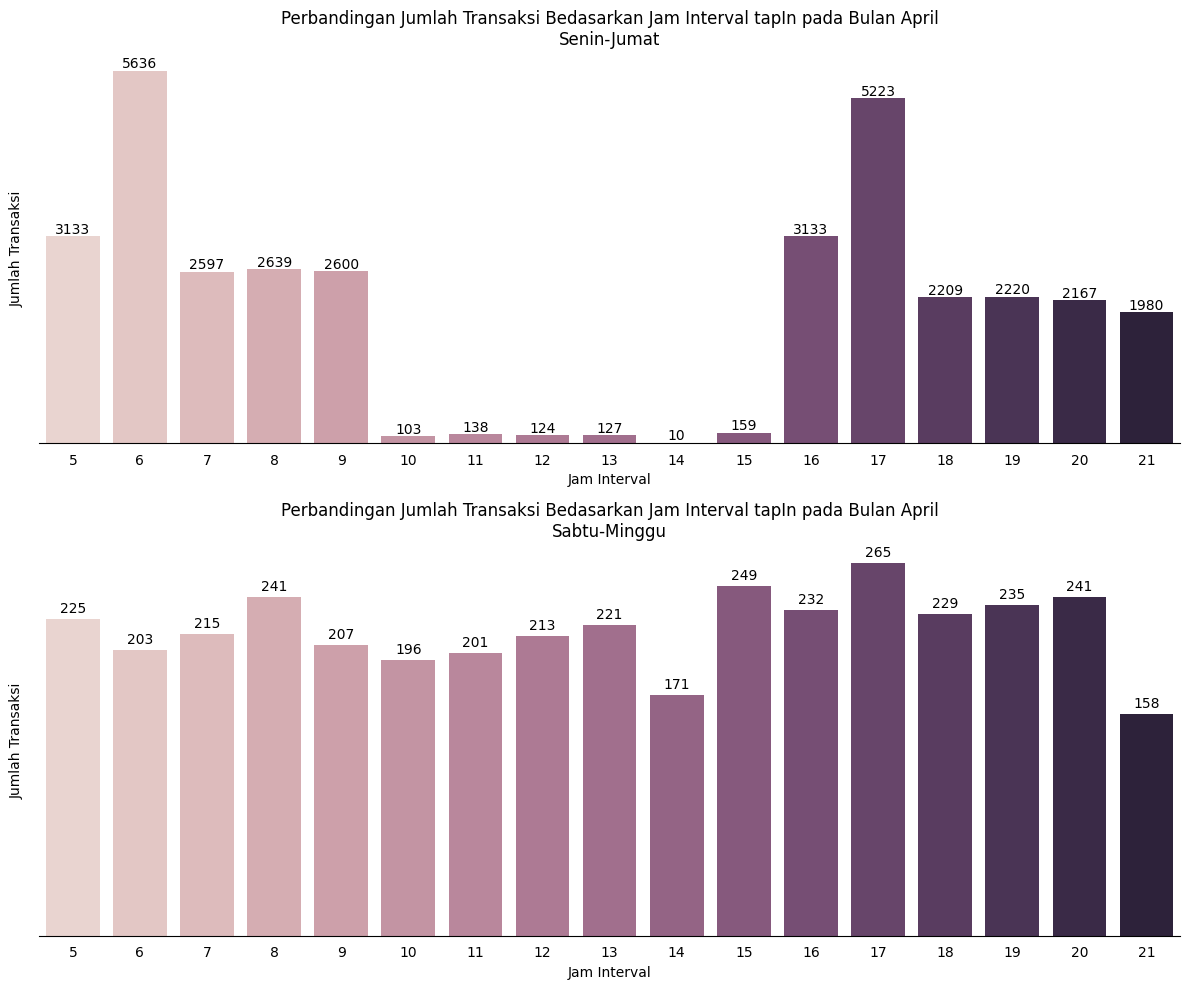

In [267]:
segment_waktu = df_clean.loc[df_clean['dayName'].isin(['Senin','Selasa','Rabu','Kamis','Jumat'])].groupby('tapInHour')['transID'].count().reset_index().sort_values(by='tapInHour')
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
ax= sns.barplot(y=segment_waktu ['transID'], x=segment_waktu ['tapInHour'],hue=segment_waktu ['tapInHour'])
ax.set_xticklabels(ax.get_xticklabels(), ha='center')

for bar in ax.patches:
    y = bar.get_height()
    x = bar.get_x() + (bar.get_width()/2)
    value = y/np.sum(segment_waktu['transID'])*100
    if y!=0:
      plt.text(x,y+50,s=f"{int(y)}",ha="center")
    else:
      plt.text(x,y,s=f"")


plt.title('Perbandingan Jumlah Transaksi Bedasarkan Jam Interval tapIn pada Bulan April\nSenin-Jumat')
plt.ylabel('Jumlah Transaksi')
plt.xlabel('Jam Interval')
ax.spines[['right','left', 'top']].set_visible(False)
ax.set(yticklabels=[])
ax.tick_params(left=False,bottom=False)
plt.tight_layout()
ax.get_legend().remove()

segment_waktu = df_clean.loc[df_clean['dayName'].isin(['Sabtu','Minggu'])].groupby('tapInHour')['transID'].count().reset_index().sort_values(by='tapInHour')
plt.subplot(2,1,2)
ax= sns.barplot(y=segment_waktu ['transID'], x=segment_waktu ['tapInHour'],hue=segment_waktu ['tapInHour'])
ax.set_xticklabels(ax.get_xticklabels(), ha='center')

for bar in ax.patches:
    y = bar.get_height()
    x = bar.get_x() + (bar.get_width()/2)
    value = y/np.sum(segment_waktu['transID'])*100
    if y!=0:
      plt.text(x,y+5,s=f"{int(y)}",ha="center")
    else:
      plt.text(x,y,s=f"")


plt.title('Perbandingan Jumlah Transaksi Bedasarkan Jam Interval tapIn pada Bulan April\nSabtu-Minggu')
plt.ylabel('Jumlah Transaksi')
plt.xlabel('Jam Interval')
ax.get_legend().remove()
ax.spines[['right','left', 'top']].set_visible(False)
ax.set(yticklabels=[])
ax.tick_params(left=False,bottom=False)
plt.tight_layout()
plt.show()

Observasi:
- Pada periode Senin-Jumat, transaksi pelanggan membentuk pola. Jumlah transaksi paling banyak pada jam 6-7 pagi dan jam 17-18 sore.
- Pada periode Senin-Jumat, jam 10-15 memiliki jumlah transaksi paling sedikit.
- Pada periode Sabtu-Minggu, transaksi pelanggan tidak membentuk pola. Jumlah transaksi tiap jam tidak berbeda jauh.

Insight:
- Pola transaksi pelanggan pada periode Senin-Jumat terbentuk sesuai dengan pola umum pekerja. Pelanggan akan berangkat ke tempat kerja pada pagi hari, kemudian bekerja hingga sore hari, sehingga terjadi penurunan jumlah transaksi pada siang hari, dan pulang dari tempat kerja pada sore hari.
- Periode Sabtu-Minggu merupakan akhir pekan, sehingga lebih banyak aktivitas rekreasi dan istirahat. Karena tidak ada batas waktu mulai atau akhir aktivitas tersebut, maka tidak ada pola pasti yang terbentuk.

#### Top 10 corridor bedasarkan jumlah transaksi per minggu

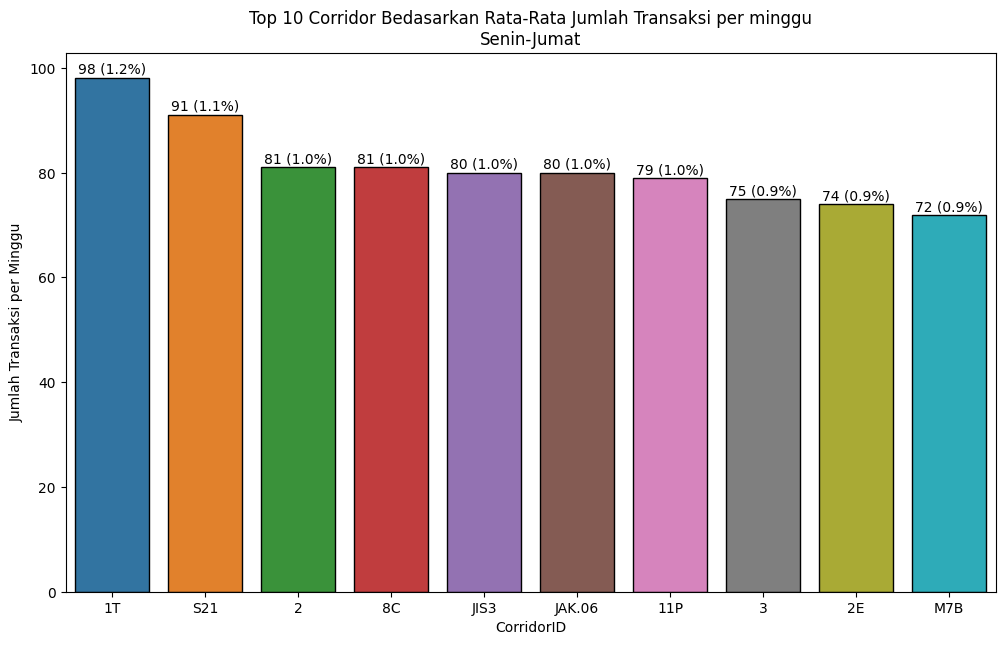

In [268]:
corr_ID_day_total = df_clean[df_clean['dayName'].isin(hari_kerja)].groupby(['corridorID'])['transID'].count().sort_values(ascending=False).reset_index()
corr_ID_day_total['transID']=np.round(corr_ID_day_total['transID']/4)
corr_ID_day_top10= corr_ID_day_total.head(10)
plt.figure(figsize=(12,7))
ax= sns.barplot(y=corr_ID_day_top10['transID'], x=corr_ID_day_top10['corridorID'],hue=corr_ID_day_top10['corridorID'],edgecolor='black')

for bar in ax.patches:
    y = bar.get_height()
    x = bar.get_x() + bar.get_width()/2
    value = y/np.sum(corr_ID_day_total['transID'])*100
    plt.text(x,y+y/100,s=f"{int(y)} ({value:.1f}%)",ha="center")

plt.title('Top 10 Corridor Bedasarkan Rata-Rata Jumlah Transaksi per minggu\nSenin-Jumat')
plt.ylabel('Jumlah Transaksi per Minggu')
plt.xlabel('CorridorID')
plt.show()


Observasi:
- Persebaran Transaksi antar top 10 corridor pada periode Senin-Jumat terlihat rata, dengan perbedaan antar corridor paling besar 0.1%.

Insight:
- Corridor-Corridor yang masuk dalam top 10 ini cenderung panjang, melewati berbagai daerah, dan memiliki banyak halte seperti corridor [S21](https://moovitapp.com/index/id/Tranportasi_Umum-line-s21-Jakarta-2044-851786-487795-0), [JAK.06](https://moovitapp.com/index/id/Tranportasi_Umum-line-jak6-Jakarta-2044-2026517-35928117-0), [8C](https://moovitapp.com/index/id/Tranportasi_Umum-line-8c-Jakarta-2044-851786-675435-0), dan seterusnya; atau melewati daerah-daerah Pusat Pemerintahan (Balai Kota, Monumen Nasional, Bank Indonesia, dan lain-lain) seperti corridor [1T](https://moovitapp.com/index/id/Tranportasi_Umum-line-1t-Jakarta-2044-851786-136912881-0), [2](https://moovitapp.com/index/id/Tranportasi_Umum-line-2-Jakarta-2044-851786-177268840-0), [3](https://moovitapp.com/index/id/Tranportasi_Umum-line-3-Jakarta-2044-851786-177268841-0), dan seterusnya. Ini menunjukkan pada hari Senin-Jumat, pelanggan menggunakan Transjakarta untuk pergi ke tempat kerja mereka.


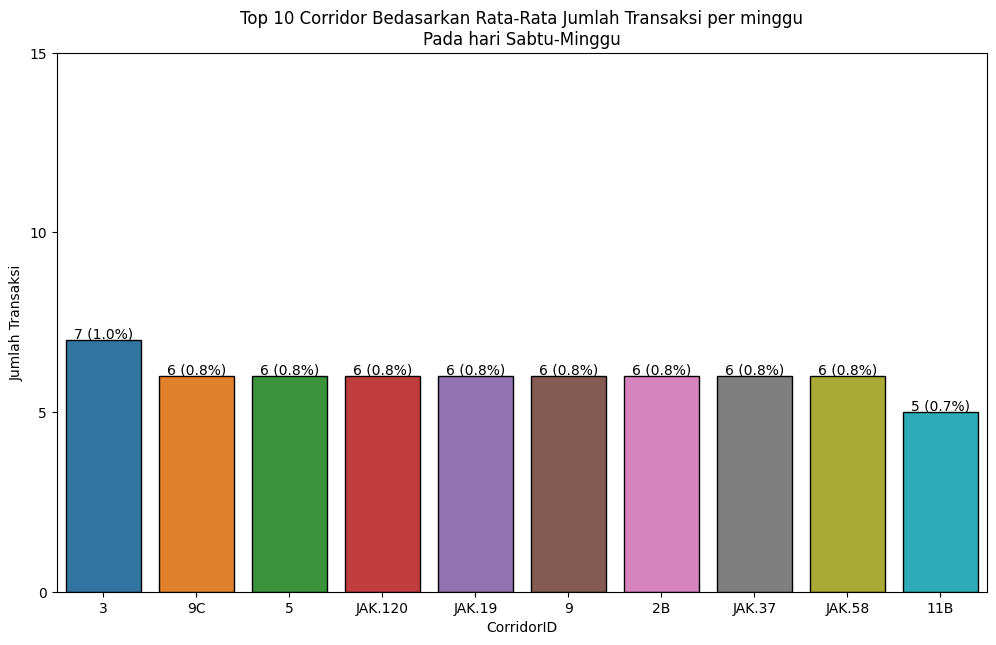

In [269]:
corr_ID_day_total = df_clean[df_clean['dayName'].isin(akhir_pekan)].groupby(['corridorID'])['transID'].count().sort_values(ascending=False).reset_index()
corr_ID_day_total['transID']=np.round(corr_ID_day_total['transID']/5)
corr_ID_day_top10= corr_ID_day_total.head(10)
plt.figure(figsize=(12,7))
ax= sns.barplot(y=corr_ID_day_top10['transID'], x=corr_ID_day_top10['corridorID'],hue=corr_ID_day_top10['corridorID'],edgecolor='black')

for bar in ax.patches:
    y = bar.get_height()
    x = bar.get_x() + bar.get_width()/2
    value = y/np.sum(corr_ID_day_total['transID'])*100
    plt.text(x,y+y/100,s=f"{int(y)} ({value:.1f}%)",ha="center")

plt.title('Top 10 Corridor Bedasarkan Rata-Rata Jumlah Transaksi per minggu\nPada hari Sabtu-Minggu')
plt.ylabel('Jumlah Transaksi')
plt.xlabel('CorridorID')
plt.yticks(ticks=np.arange(0,20,5))
plt.show()

Observasi:
- Persebaran Transaksi antar top 10 corridor pada periode Sabtu dan Minggu terlihat rata, dengan perbedaan antar corridor paling besar 1 transaksi.

Insight:
- Koridor-Koridor yang masuk dalam top 10 ini cenderung melewati daerah-daerah wisata (Monumen Nasional, Bundaran Senayan, Ancol) seperti corridor [3](https://moovitapp.com/index/id/Tranportasi_Umum-line-3-Jakarta-2044-851786-177268841-0), [9C](https://moovitapp.com/index/id/Tranportasi_Umum-line-9c-Jakarta-2044-851786-177268863-0), [5](https://moovitapp.com/index/id/Tranportasi_Umum-line-5-Jakarta-2044-851786-177268842-0), dan seterusnya; Atau merupakan corridor gratis (payAmount = 0) seperti corridor JAK.120, JAK.19, JAK.37, JAK.58, dan 11B. Ini menunjukkan pada hari sabtu dan minggu Pelanggan menggunakan Transjakarta untuk pergi ke tempat wisata atau transportasi gratis.

### Segmentasi Pengguna

#### bedasarkan payCardBank

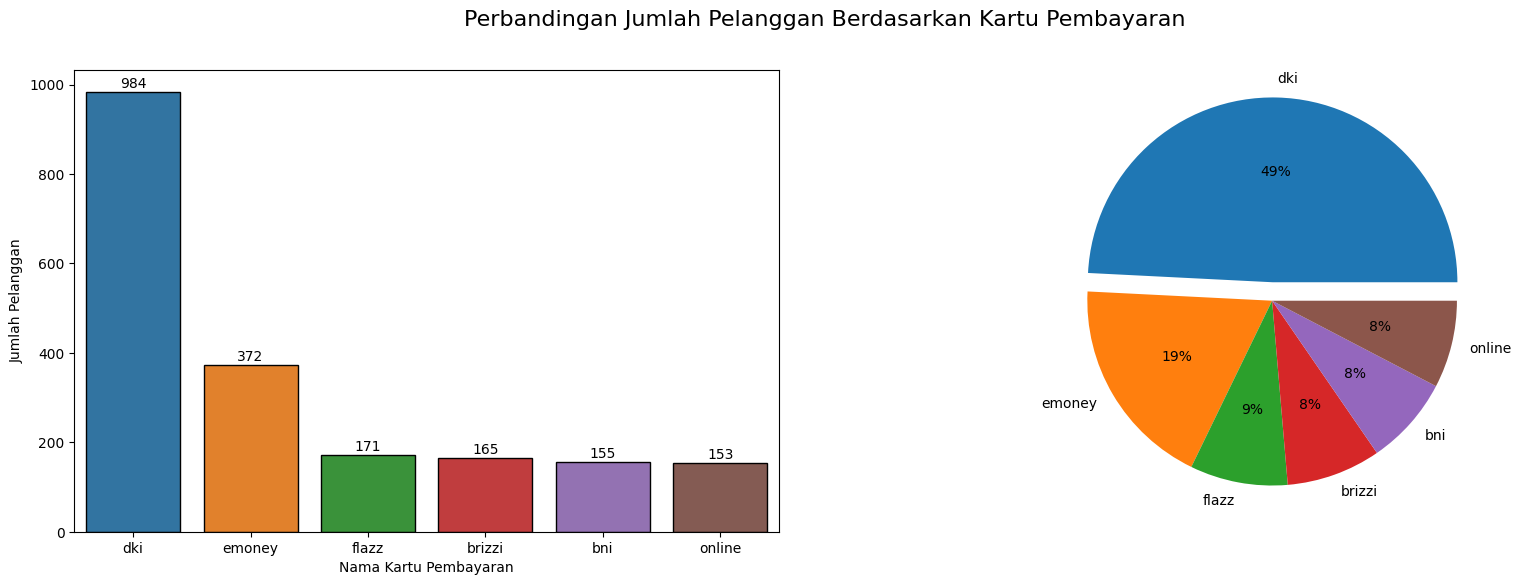

In [270]:
map_paycard = dict(zip(['dki','emoney','flazz','brizzi','bni','online'], sns.color_palette(n_colors=len(['dki','emoney','flazz','brizzi','bni','online']))))
segment_bank = df_clean.groupby('payCardBank')['payCardID'].nunique().sort_values(ascending=False).reset_index()
explode_segments = []
for val in segment_bank['payCardBank']:
  if val == 'dki':
    explode_segments.append(0.1)
  else:
    explode_segments.append(0)
plt.figure(figsize=(20,6)).suptitle("Perbandingan Jumlah Pelanggan Berdasarkan Kartu Pembayaran", fontsize=16)

plt.subplot(1,2,1)
ax = sns.barplot(y=segment_bank['payCardID'], x=segment_bank['payCardBank'],hue=segment_bank['payCardBank'],palette=map_paycard,edgecolor='black')

for bar in ax.patches:
    y = bar.get_height()
    x = bar.get_x() + bar.get_width()/2
    plt.text(x,y+10,s=f"{int(y)}",ha="center")

plt.ylabel('Jumlah Pelanggan')
plt.xlabel('Nama Kartu Pembayaran')




plt.subplot(1,2,2)
plt.pie(x=segment_bank['payCardID'],labels=segment_bank['payCardBank'],autopct='%.0f%%', explode=explode_segments)
plt.show()

Observasi:
- Kebanyakan Pelanggan menggunakan kartu dki (49%) untuk melakukan transaksi, diikuti oleh kartu emoney (19%).

Insight:
- Bank DKI menerbitkan kartu JakLingko yang merupakan kartu pembayaran yang terintegrasi dengan berbagai moda transportasi di Jakarta, termasuk Transjakarta. JakLingko menyediakan berbagai kemudahan dan promosi.
- emoney merupakan kartu pembayaran yang dikeluarkan oleh bank Mandiri dan dikatakan sebagai penguasa uang elektronik pada 2017 menurut sumber [ini](https://www.cnnindonesia.com/ekonomi/20171023132556-78-250309/bi-sebut-e-money-bank-mandiri-kuasai-pasar-duit-elektronik). Sehingga dapat menduduki peringkat kedua dalam jumlah transaksi.
- brizzi merupakan kartu pembayaran milik BRI dan Flazz milik BCA.


#### Segmentasi pelanggan bedasarkan kartu pembayaran pelanggan dibagi kelompok umur pelanggan

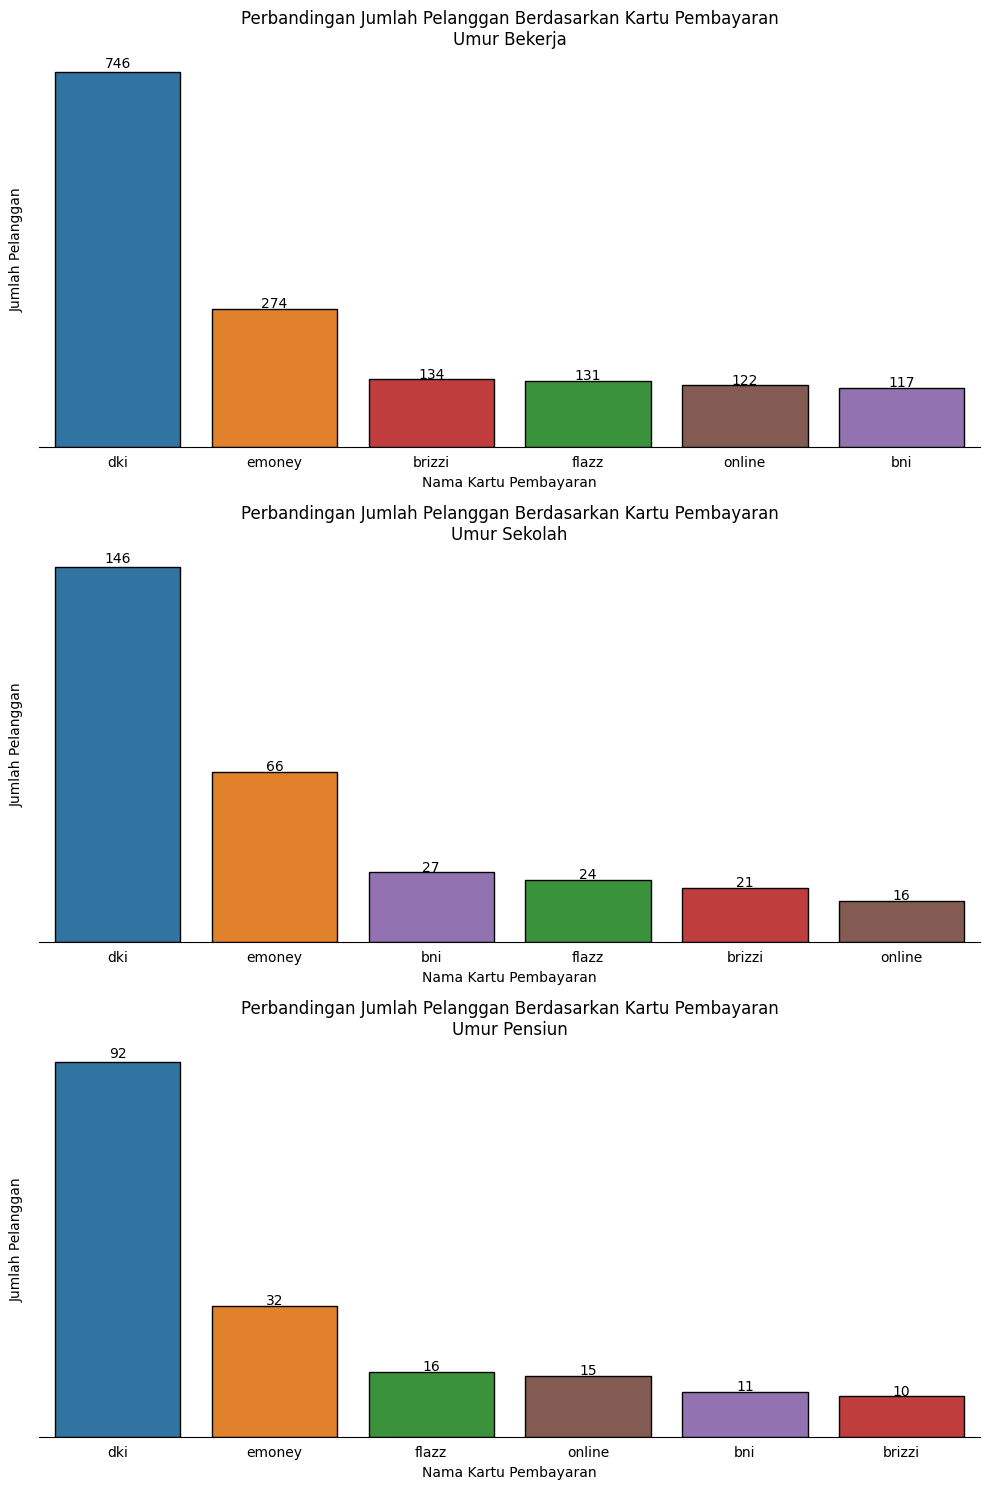

In [271]:
age_group = ['Umur Bekerja','Umur Sekolah','Umur Pensiun']

plt.figure(figsize=(10,15))
for ind in range(3):
  plt.subplot(3,1,ind+1)
  plt
  segment_bank = df_clean.loc[df_clean['ageGroup']==age_group[ind]].groupby(['payCardBank'])['payCardID'].nunique().sort_values(ascending=False).reset_index()

  ax = sns.barplot(y=segment_bank['payCardID'], x=segment_bank['payCardBank'],hue=segment_bank['payCardBank'],palette=map_paycard,edgecolor='black')

  for bar in ax.patches:
      y = bar.get_height()
      x = bar.get_x() + bar.get_width()/2
      if y!=0:
        plt.text(x,y+y/100,s=f"{int(y)}",ha="center")
      else:
        plt.text(x,y,s=f"")
  plt.title(f'Perbandingan Jumlah Pelanggan Berdasarkan Kartu Pembayaran\n{age_group[ind]}')
  plt.ylabel('Jumlah Pelanggan')
  plt.xlabel('Nama Kartu Pembayaran')
  ax.spines[['right','left', 'top']].set_visible(False)
  ax.set(yticklabels=[])
  ax.tick_params(left=False,bottom=False)
  plt.tight_layout()

Observasi:
- Kartu Pembayaran dki dan emoney konsisten menduduki peringkat 1 dan 2 dalam jumlah pelanggan transjakarta di semua demografi umur (Umur Sekolah, Pekerja dan Pensiun)

#### bedasarkan payCardSex

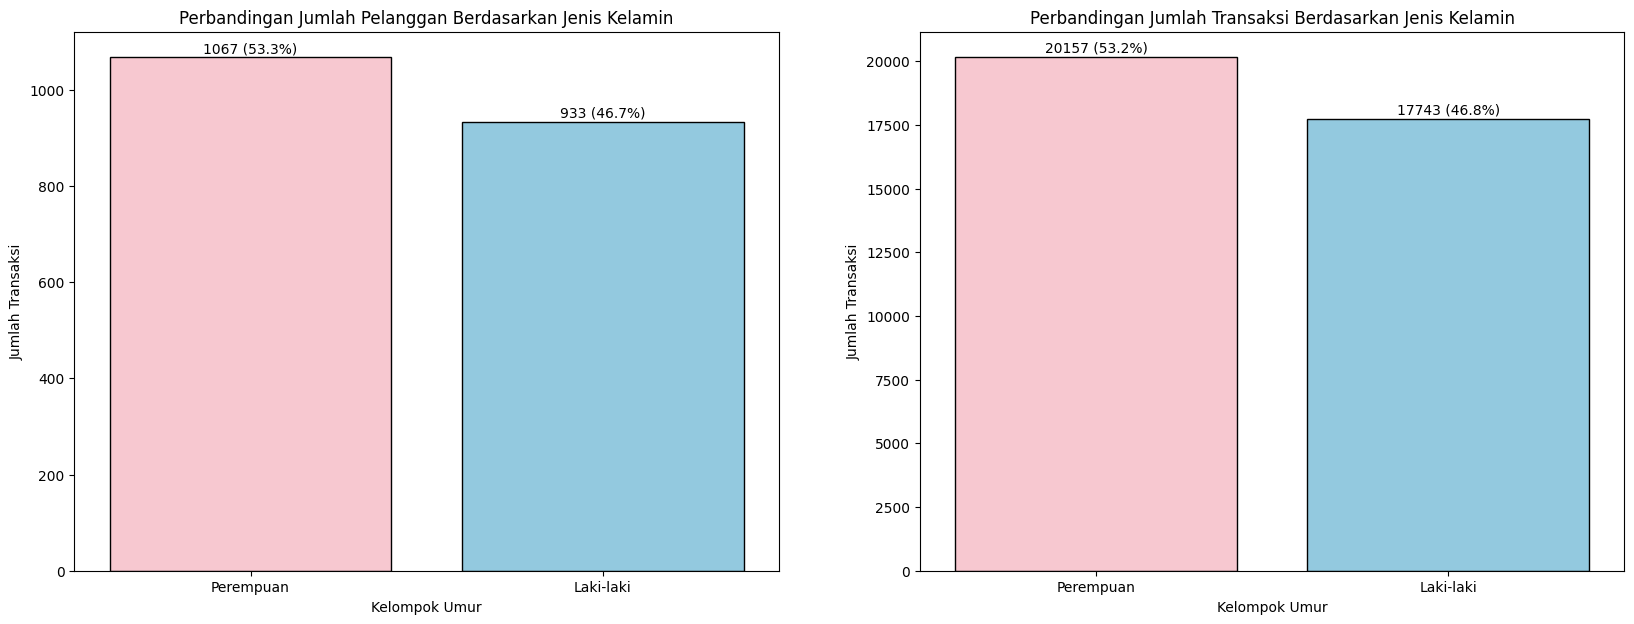

In [272]:
segment_jk = df_clean.groupby('payCardSex')['payCardID'].nunique().sort_values(ascending=False).reset_index()
segment_jk['payCardSex'].replace({'F':'Perempuan','M':'Laki-laki'},inplace=True)
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
ax= sns.barplot(y=segment_jk['payCardID'], x=segment_jk['payCardSex'],hue=segment_jk['payCardSex'],palette=['pink','skyblue'],edgecolor='black')

for bar in ax.patches:
    y = bar.get_height()
    x = bar.get_x() + bar.get_width()/2
    value = y/np.sum(segment_jk['payCardID'])*100
    plt.text(x,y+10,s=f"{int(y)} ({value:.1f}%)",ha="center")

plt.title('Perbandingan Jumlah Pelanggan Berdasarkan Jenis Kelamin')
plt.ylabel('Jumlah Transaksi')
plt.xlabel('Kelompok Umur')

segment_jk = df_clean.groupby('payCardSex')['transID'].count().sort_values(ascending=False).reset_index()
segment_jk['payCardSex'].replace({'F':'Perempuan','M':'Laki-laki'},inplace=True)
plt.subplot(1,2,2)
ax= sns.barplot(y=segment_jk['transID'], x=segment_jk['payCardSex'],hue=segment_jk['payCardSex'],palette=['pink','skyblue'],edgecolor='black')

for bar in ax.patches:
    y = bar.get_height()
    x = bar.get_x() + bar.get_width()/2
    value = y/np.sum(segment_jk['transID'])*100
    plt.text(x,y+y/100,s=f"{int(y)} ({value:.1f}%)",ha="center")

plt.title('Perbandingan Jumlah Transaksi Berdasarkan Jenis Kelamin')
plt.ylabel('Jumlah Transaksi')
plt.xlabel('Kelompok Umur')
plt.show()

observasi:
- Jumlah Pelanggan Perempuan 3.3% lebih banyak daripada Laki-laki
- Jumlah Transaksi Pelanggan Perempuan 3.2% lebih banyak daripada Laki-laki

Insight:
- Perempuan lebih banyak menggunakan transportasi dikarenakan bis transjakarta menyediakan berbagai fasilitas (seperti bangku prioritas dan bis khusus Perempuan) sehingga mereka merasa lebih aman dan nyaman naik bis Transjakarta
- Proporsi antara jumlah transaksi antara laki-laki dan perempuan kurang lebih seimbang.

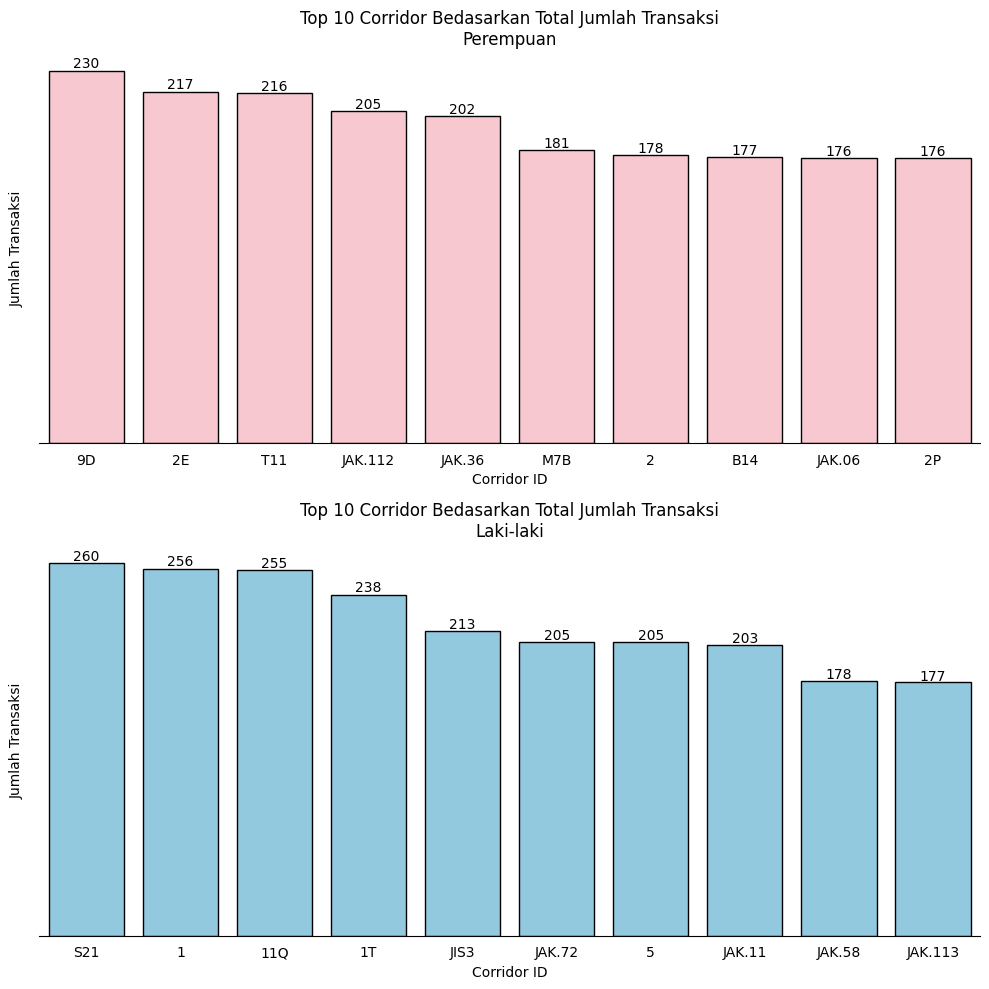

In [273]:
# segment_jk = df_clean.groupby('payCardSex')['payCardID'].nunique().sort_values(ascending=False).reset_index()
# segment_jk['payCardSex'].replace({'F':'Perempuan','M':'Laki-laki'},inplace=True)
sex_group = ['F','M']
sex_name = ['Perempuan','Laki-laki']
sex_color = ['pink','skyblue']

plt.figure(figsize=(10,10))
for ind in range(2):
  plt.subplot(2,1,ind+1)
  plt
  segment_sex_total = df_clean.loc[df_clean['payCardSex']==sex_group[ind]].groupby(['corridorID'])['transID'].count().sort_values(ascending=False).reset_index()
  segment_sex_top10 = segment_sex_total.head(10)
  ax = sns.barplot(y=segment_sex_top10['transID'], x=segment_sex_top10['corridorID'],color=sex_color[ind],edgecolor='black')

  for bar in ax.patches:
      y = bar.get_height()
      x = bar.get_x() + bar.get_width()/2
      if y!=0:
        plt.text(x,y+y/100,s=f"{int(y)}",ha="center")
      else:
        plt.text(x,y,s=f"")

  plt.title(f'Top 10 Corridor Bedasarkan Total Jumlah Transaksi\n{sex_name[ind]}')
  plt.ylabel('Jumlah Transaksi')
  plt.xlabel('Corridor ID')
  ax.spines[['right','left', 'top']].set_visible(False)
  ax.set(yticklabels=[])
  ax.tick_params(left=False,bottom=False)
  plt.tight_layout()

Observasi:
- Tidak ada irisan antara Top 10 corridor berdasarkan pelanggan laki-laki dan perempuan.
- Jumlah transaksi tiap corridor pelanggan laki-laki lebih banyak daripada jumlah transaksi tiap corridor segmen perempuan.

Insight:
- Perbedaan top 10 corridor berdasarkan segmen laki-laki dan perempuan menunjukkan bahwa ada perbedaan tempat tujuan antara pelanggan perempuan dan pelanggan laki-laki.
- Jumlah transaksi tiap corridor segmen perempuan yang lebih rendah daripada segmen laki-laki walaupun jumlah pelanggan perempuan yang lebih banyak menunjukkan bahwa pola transaksi laki-laki sedikit lebih terkonsentrasi pada top 10 corridor segmennya dibandingkan dengan segmen perempuan.


#### bedasarkan ageGroup

<ipython-input-274-8af747089f0c>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), ha='center')


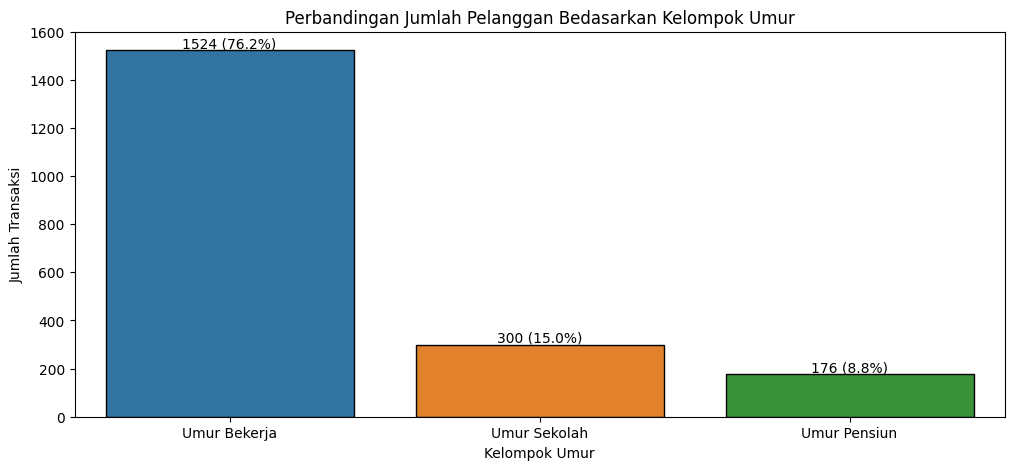

In [274]:
segment_umur = df_clean.groupby('ageGroup')['payCardID'].nunique().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12,5))
ax= sns.barplot(y=segment_umur['payCardID'], x=segment_umur['ageGroup'],hue=segment_umur['ageGroup'],edgecolor='black')
ax.set_xticklabels(ax.get_xticklabels(), ha='center')

for bar in ax.patches:
    y = bar.get_height()
    x = bar.get_x() + bar.get_width()/2
    value = y/np.sum(segment_umur['payCardID'])*100
    plt.text(x,y+10,s=f"{int(y)} ({value:.1f}%)",ha="center")

plt.title('Perbandingan Jumlah Pelanggan Bedasarkan Kelompok Umur')
plt.ylabel('Jumlah Transaksi')
plt.xlabel('Kelompok Umur')
plt.show()


Observasi:
- Lebih dari 1500 (76.2%) pelanggan Teransjakarta berada dalam kelompok umur bekerja, 300 (15%) pelanggan berada dalam kelompok umur pelajar, dan 176 (8.8%) berada dalam kelompok umur pensiun.


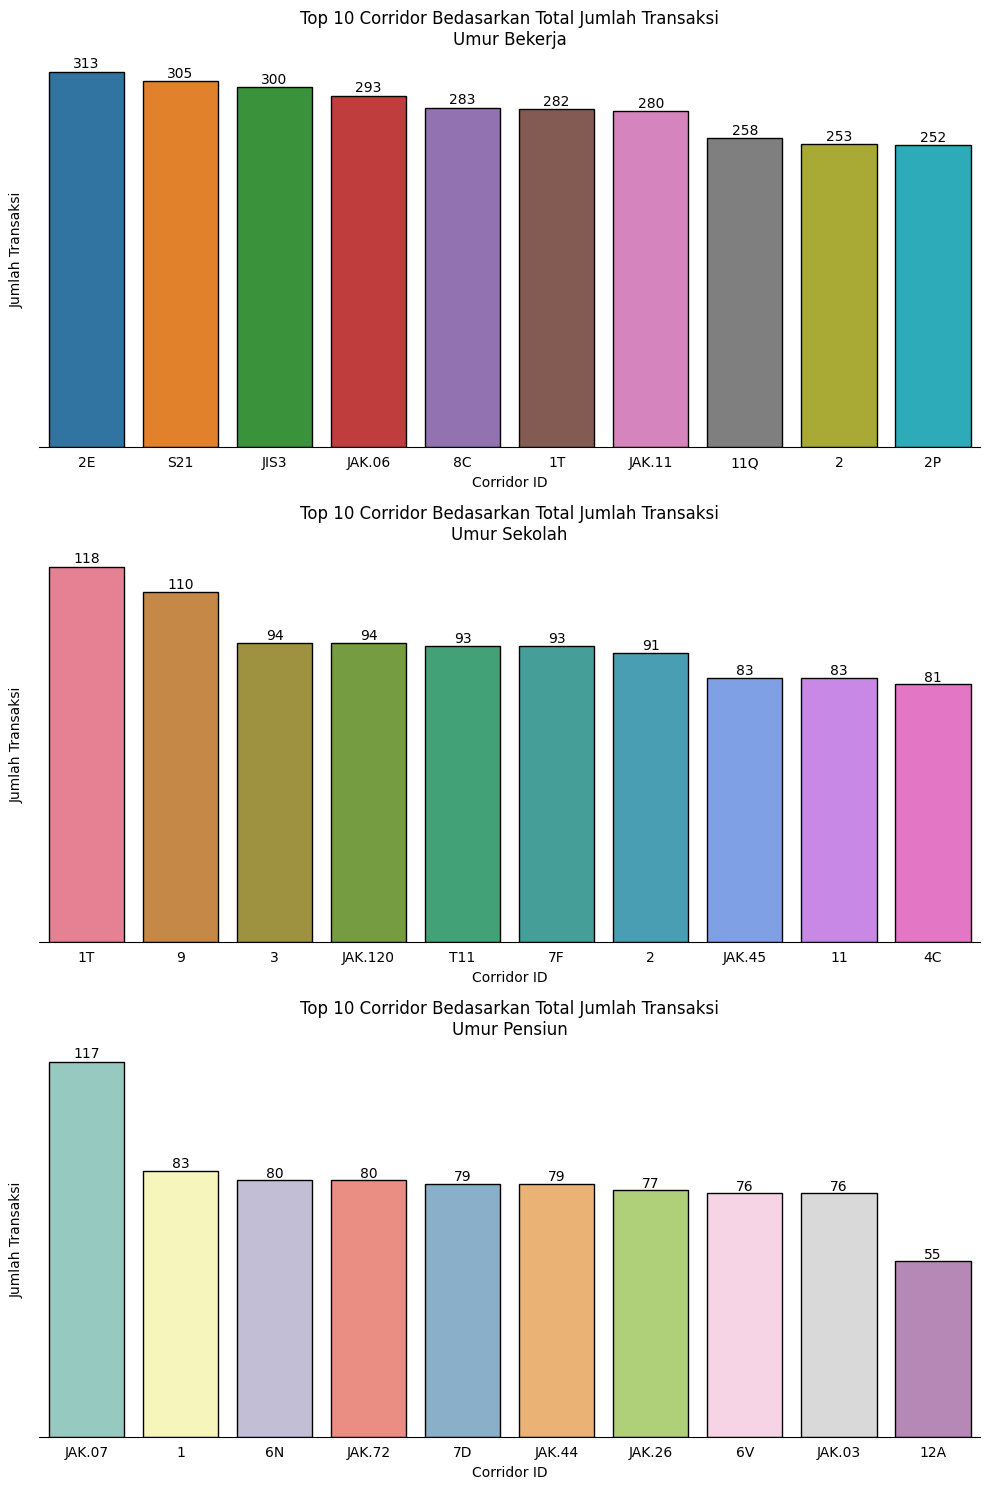

In [275]:
age_group = ['Umur Bekerja','Umur Sekolah','Umur Pensiun']
age_group_palette= ['tab10','Set2','Set3']
#[df_clean['dayName'].isin(hari_kerja)]
corr_ID_age = df_clean.groupby(['corridorID','ageGroup'])['transID'].count().sort_values(ascending=False).reset_index()
corr_ID_age['transID']=np.round(corr_ID_age['transID'])

plt.figure(figsize=(10,15))
for ind in range(3):
  plt.subplot(3,1,ind+1)
  corr_ID_fokus = corr_ID_age.loc[corr_ID_age['ageGroup']==age_group[ind]].head(10)
  sns.set_palette(age_group_palette[ind])
  ax = sns.barplot(y=corr_ID_fokus['transID'], x=corr_ID_fokus['corridorID'],hue=corr_ID_fokus['corridorID'],edgecolor='black')

  for bar in ax.patches:
      y = bar.get_height()
      x = bar.get_x() + bar.get_width()/2
      if y!=0:
        plt.text(x,y+y/100,s=f"{int(y)}",ha="center")
      else:
        plt.text(x,y,s=f"")
  plt.title(f'Top 10 Corridor Bedasarkan Total Jumlah Transaksi\n{age_group[ind]}')
  plt.ylabel('Jumlah Transaksi')
  plt.xlabel('Corridor ID')
  ax.spines[['right','left', 'top']].set_visible(False)
  ax.set(yticklabels=[])
  ax.tick_params(left=False,bottom=False)
  plt.tight_layout()

sns.set_palette('tab10')
plt.show()

Observasi:
- Corridor 1T muncul dalam Top 10 corridor segmen umur bekerja dan umur sekolah.
- 5 dari 10 corridor dalam Top 10 Corridor segmen Umur Pensiun adalah corridor Microtrans, dan corridor dengan transaksi paling banyak pada segmen ini adalah corridor Microtrans yaitu JAK.07

Insight:
- Corridor dalam Top 10 corridor segmen umur sekolah cenderung memiliki halte dekat sekolah seperti corridor 1T terdapat sekolah SMAN 64  Jakarta, SMPN 165 Jakarta, dan SDN Cibubur 02 Pagi; corridor 9 terdapat sekolah SMAN 84 Jakarta, SMPN 2 Jakarta, SMAN Jakarta, dan seterusnya. Ini mendukung asumsi sebagaian besar pelanggan umur sekolah menggunakan transjakarta untuk pergi ke dan pulang dari sekolah.
- Corridor 1T terdapat dalam Top 10 segmen umur bekerja dan pelajar. Ini menunjukkan bahwa selama rutenya strategis, pellanggan kedua segmen rela membayar biaya 20000 untuk transportasi seharian mereka.
- 5 dari top 10 corridor segmen umur pensiun adalah mikrotrans, Ini menunjukkan umur pensiun lebih memilih layanan transjakarta yang gratis. Bisa juga segmen ini lebih nyaman menggunakan transportasi yang lebih mirip angkot.

### Analisa Pelanggan yang tidak tapOut

In [276]:
this = df_clean['tapOutStopsName'].dropna()
no_tapOut= df_clean.loc[df_clean['tapOutStopsName'].isnull()==True]
print('Jumlah Pelanggan yang melakukan tapOut: ',len(df_clean['tapOutStopsName'].dropna()))
print('Jumlah Pelanggan yang tidak melakukan tapOut: ',len(no_tapOut))
print(f'Jumlah proporsi pelanggan yang melakukan tapOut: {round(len(this)/len(df_clean)*100,2)}%')
print(f'Jumlah Pelanggan yang tidak melakukan tapOut: {round(len(no_tapOut)/len(df_clean)*100,2)}%',)

Jumlah Pelanggan yang melakukan tapOut:  36556
Jumlah Pelanggan yang tidak melakukan tapOut:  1344
Jumlah proporsi pelanggan yang melakukan tapOut: 96.45%
Jumlah Pelanggan yang tidak melakukan tapOut: 3.55%


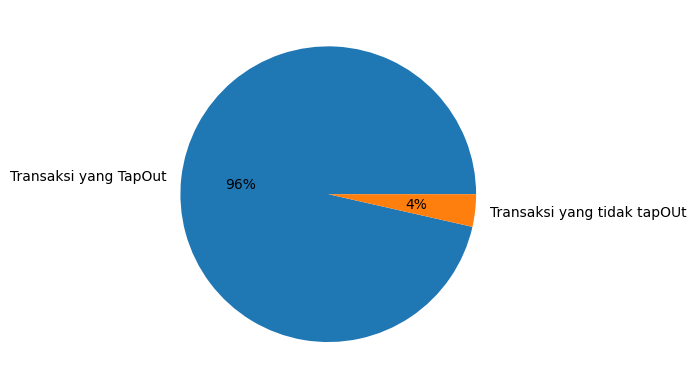

In [277]:

plt.pie(x=[len(df_clean['tapOutStopsName'].dropna()),len(no_tapOut)],labels=['Transaksi yang TapOut','Transaksi yang tidak tapOUt'],autopct='%.0f%%')
plt.show()

Jumlah pelanggan yang tidak melakukan kurang dari 5% dari seluruh transaksi pada bulan April 2023, maka jumlah transaksi yang tidak melakukan tapOut dianggap tidak signifikan.


# Kesimpulan dan Rekomendasi

## Kesimpulan

Dari Analisis yang telah dilakukan, Kita bisa melakukan kesimpulan tentang pelanggan Transjakarta.
- Kebanyakan Pelanggan menggunakan layanan Transjakarta pada hari-hari kerja (Senin-Jumat). Sebaliknya Pengunaan layanan Transjakarta oleh pelanggan jauh lebih sedikit pada akhir pekan (Sabtu & Minggu)
- Pada hari-hari kerja Transaksi Pelanggan membentuk pola dimana sebagian besar transaksi dilakukan pada pagi hari berpuncak pada jam 6 pagi dan sore hari berpuncak pada malam hari. Pada siang hari, khususnya diantara jam 10-15 sangat sedikit transaksi terjadi.
- Pada akhir pekan, jumlah transaksi tidak membentuk pola dan lebih merata dibandingkan dengan hari-hari kerja.
- 49% pelanggan melakukan transaksi dengan karty pembayaran bank dki.
- Lebih banyak pelanggan Perempuan daripada Pelanggan Laki-laki. Walaupun demikian, selisih antara perempuan dan Laki-laki adalah 3.3%, proporsi jumlah transaksi antara laki-laki dan perempuana kurang lebih seimbang.
- 76.2% Pelanggan Transjakarta masuk kedalam kelompok umur bekerja (18-53 tahun), walaupun demikian, terdapat 300 pelanggan umur sekolah (dibawah 17 tahun) dan 176 pelanggan umur pensiun (diatas 53 tahun).
- Sebagian besar pelanggan umur sekolah menggunakan layanan Transjakarta untuk pergi pulang sekolah.
- Pelanggan umur pensiun lebih memilih layanan mikrotrans, dikarenakan biaya yang gratis dan kendaraan yang mirip angkot.
- Jumlah transaksi dimana pelanggan tidak melakukan tapOut kurang dari 5% (3.55%) sehingga tidak menjadi masalah yang signifikan.

## Rekomendasi

- Mengadakan kerjasama dengan pihak-pihak rekreasi, seperti pihak Monumen nasional, pusat pembelanjaan sekitar bunderan senayan (Senayan city, Plaza Senayan, Fx Sudirman), dan Pengelolah tempat wisata (seperti Ancol Korporat), dalam bentuk promosi, sistem poin member, dan seterusnya untuk meningkatkan minat pelanggan untuk menggunakan bus transjakarta pada akhir pekan.
- Pada hari Senin-Jumat, tambahkan armada bus pada pagi hari, terutama jam 6 pagi dan pada sore hari, terutama jam 17 sore, dan mengurangi armada pada interval jam 10-15.
- Melanjutkan dan mengembangkan kerjasama dengan bank dki, dan mulai menjalin kerjasama dengan bank mandiri agar mencapai pelanggan yang lebih banyak.
- Mempertahankan fasilitas-fasilitas prioritas perempuan agar pelanggan perempuan tetap tertarik menggunakan layanan Transjakarta.
- Jika ingin melakukan program untuk meningkatkan jumlah pelanggan umur sekolah, direkomendasikan melakukan program pada corridor T1, 3 dan 9 sebagai titik loncat.
- Jika ingin melakukan program untuk meningkatkan jumlah pelanggan umur pensiun, direkomendasikan mengembangkan program mikrotrans khusus lansia yang memberikan kemudahan lebih bagi mereka.



# Dashboard

https://public.tableau.com/app/profile/benedict.e.sutrisna/viz/Modul2CapstoneBES/DashboardTransjakarta